In [ ]:
#importando o pandas
import pandas as pd
#Importando a biblioteca para tratar graficamente e estatisticamente os dados
import matplotlib.pyplot as plt

# Acessando dados do site 

In [ ]:
#Acessando os 4 arquivos gerados
data1_2020 = pd.read_csv('/content/drive/MyDrive/HIST_PAINEL_COVIDBR_08jul2021/HIST_PAINEL_COVIDBR_2020_Parte1_08jul2021.csv',sep=';')
data2_2020 = pd.read_csv('/content/drive/MyDrive/HIST_PAINEL_COVIDBR_08jul2021/HIST_PAINEL_COVIDBR_2020_Parte2_08jul2021.csv',sep=';')
data1_2021 = pd.read_csv('/content/drive/MyDrive/HIST_PAINEL_COVIDBR_08jul2021/HIST_PAINEL_COVIDBR_2021_Parte1_08jul2021.csv',sep=';')
data2_2021 = pd.read_csv('/content/drive/MyDrive/HIST_PAINEL_COVIDBR_08jul2021/HIST_PAINEL_COVIDBR_2021_Parte2_08jul2021.csv',sep=';')

#Juntando eles em um DataFrame único
df_Covid_Brasil = pd.concat([data1_2020,data2_2020,data1_2021,data2_2021])

In [ ]:
#Retirando algumas colunas indesejáveis
df_Covid_Brasil.drop(['codRegiaoSaude', 'nomeRegiaoSaude', 'semanaEpi', 'emAcompanhamentoNovos', 'interior/metropolitana' ], axis=1,inplace=True)

In [ ]:
#Filtrar para o Espírito Santo
df_mask=df_Covid_Brasil['estado']=='ES'
df_Covid_ES = df_Covid_Brasil[df_mask]

In [ ]:
#Filtrar para Minas Gerais
df_mask1=df_Covid_Brasil['estado']=='MG'
df_Covid_MG = df_Covid_Brasil[df_mask1]

In [ ]:
#Filtrar para o Rio de Janeiro
df_mask2=df_Covid_Brasil['estado']=='RJ'
df_Covid_RJ = df_Covid_Brasil[df_mask2]

In [ ]:
#Filtrar para São Paulo
df_mask3=df_Covid_Brasil['estado']=='SP'
df_Covid_SP = df_Covid_Brasil[df_mask3]

In [ ]:
#Informação estatística sobre o ES
df_Covid_ES.describe()

,coduf,codmun,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos
count,37551.0,37051.000000,3.708200e+04,37551.000000,37551.000000,37551.000000,37551.000000,0.0
mean,32.0,320286.531646,1.050125e+05,5335.730899,27.982371,119.073766,0.618572,NaN
std,0.0,159.046351,4.678346e+05,30631.259674,148.252172,665.837987,3.645868,NaN
min,32.0,320000.000000,4.304000e+03,0.000000,-105.000000,0.000000,-7.000000,NaN
25%,32.0,320150.000000,1.222400e+04,194.000000,0.000000,4.000000,0.000000,NaN
50%,32.0,320305.000000,2.140200e+04,719.000000,3.000000,16.000000,0.000000,NaN
75%,32.0,320430.000000,3.385000e+04,1974.000000,11.000000,40.000000,0.000000,NaN
max,32.0,320530.000000,4.018650e+06,525383.000000,3826.000000,11614.000000,111.000000,NaN


In [ ]:
#Avaliar nulos no ES
df_Covid_ES.isnull().sum()

regiao                  0
estado                  0
municipio             969
coduf                   0
codmun                500
data                    0
populacaoTCU2019      469
casosAcumulado          0
casosNovos              0
obitosAcumulado         0
obitosNovos             0
Recuperadosnovos    37551
dtype: int64

In [ ]:
#Transformando a coluna 'Data' para o tipo especial datetime
df_Covid_ES['data'] = pd.to_datetime(df_Covid_ES['data'])
df_Covid_MG['data'] = pd.to_datetime(df_Covid_MG['data'])
df_Covid_RJ['data'] = pd.to_datetime(df_Covid_RJ['data'])
df_Covid_SP['data'] = pd.to_datetime(df_Covid_SP['data'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
#Ordenando as datas
df_Covid_ES_Ordem = df_Covid_ES.sort_values(by=['data'])
df_Covid_MG_Ordem = df_Covid_MG.sort_values(by=['data'])
df_Covid_RJ_Ordem = df_Covid_RJ.sort_values(by=['data'])
df_Covid_SP_Ordem = df_Covid_SP.sort_values(by=['data'])

In [ ]:
#Verificando os dias únicos (Quantidades de dias na pandemia)
len(df_Covid_ES_Ordem.data.unique())

500

Calculando a Primeira parte:

* A média de casos de pessoas contaminadas junho de 2021;
* A média de pessoas que vieram a óbito
durante o mês de junho de 2021;
* A média e desvio padrão de casos e óbitos durante todo o período 2020/2021;
* Encontrar a moda e quartis para junho de 2021;
* Encontrar a moda e quartis para o período 2020/2021.

# Junho de 2021.

* Cálculo da média, moda e quartis para os casos e óbitos.

In [ ]:
#Transformar a coluna 'Data' em índice
df_Covid_ES_Ordem.set_index('data',inplace=True)
df_Covid_MG_Ordem.set_index('data',inplace=True)
df_Covid_RJ_Ordem.set_index('data',inplace=True)
df_Covid_SP_Ordem.set_index('data',inplace=True)

In [ ]:
#Juntando os dados com dias iguais e pegando as colunas pelo máximo (valor do dia)
df_Covid_ES_New = df_Covid_ES_Ordem.groupby(df_Covid_ES_Ordem.index).agg({'casosNovos' :max,
                                                                          'casosAcumulado' :max,
                                                                          'obitosNovos':max,
                                                                          'obitosAcumulado': max})
#Juntando os dados com dias iguais e pegando as colunas pelo máximo (valor do dia)
df_Covid_MG_New = df_Covid_MG_Ordem.groupby(df_Covid_MG_Ordem.index).agg({'casosNovos' :max,
                                                                          'casosAcumulado' :max,
                                                                          'obitosNovos':max,
                                                                          'obitosAcumulado': max})
#Juntando os dados com dias iguais e pegando as colunas pelo máximo (valor do dia)
df_Covid_RJ_New = df_Covid_RJ_Ordem.groupby(df_Covid_RJ_Ordem.index).agg({'casosNovos' :max,
                                                                          'casosAcumulado' :max,
                                                                          'obitosNovos':max,
                                                                          'obitosAcumulado': max})
#Juntando os dados com dias iguais e pegando as colunas pelo máximo (valor do dia)
df_Covid_SP_New = df_Covid_SP_Ordem.groupby(df_Covid_SP_Ordem.index).agg({'casosNovos' :max,
                                                                          'casosAcumulado' :max,
                                                                          'obitosNovos':max,
                                                                          'obitosAcumulado': max})

In [ ]:
#Criando o conjunto para ver a média em junho/2021
indexNames = df_Covid_ES_New[(df_Covid_ES_New.index >= '2021-07-01')].index
df_Covid_ES_New_Junho = df_Covid_ES_New.drop(indexNames)
df_Covid_MG_New_Junho = df_Covid_MG_New.drop(indexNames)
df_Covid_RJ_New_Junho = df_Covid_RJ_New.drop(indexNames)
df_Covid_SP_New_Junho = df_Covid_SP_New.drop(indexNames)
indexNames = df_Covid_ES_New[(df_Covid_ES_New.index <= '2021-05-31')].index
df_Covid_ES_New_Junho = df_Covid_ES_New_Junho.drop(indexNames)
df_Covid_MG_New_Junho = df_Covid_MG_New_Junho.drop(indexNames)
df_Covid_RJ_New_Junho = df_Covid_RJ_New_Junho.drop(indexNames)
df_Covid_SP_New_Junho = df_Covid_SP_New_Junho.drop(indexNames)

In [ ]:
#Calculando a média de casos em junho/2021
media_jun_2021_casosES = df_Covid_ES_New_Junho.casosNovos.mean()
media_jun_2021_casosMG = df_Covid_MG_New_Junho.casosNovos.mean()
media_jun_2021_casosRJ = df_Covid_RJ_New_Junho.casosNovos.mean()
media_jun_2021_casosSP = df_Covid_SP_New_Junho.casosNovos.mean()
#Calculando a média de óbitos em junho/2021
media_jun_2021_obitosES = df_Covid_ES_New_Junho.obitosNovos.mean()
media_jun_2021_obitosMG = df_Covid_MG_New_Junho.obitosNovos.mean()
media_jun_2021_obitosRJ = df_Covid_RJ_New_Junho.obitosNovos.mean()
media_jun_2021_obitosSP = df_Covid_SP_New_Junho.obitosNovos.mean()
print(f'A média de casos no ES em Junho de 2021 é {(media_jun_2021_casosES):.2f} e a média de mortes no ES em junho de 2021 é {(media_jun_2021_obitosES):.2f}.\nA média de casos em MG em Junho de 2021 é {(media_jun_2021_casosMG):.2f} e a média de mortes em MG em junho de 2021 é {(media_jun_2021_obitosMG):.2f}.\nA média de casos no RJ em Junho de 2021 é {(media_jun_2021_casosRJ):.2f} e a média de mortes no RJ em junho de 2021 é {(media_jun_2021_obitosRJ):.2f}.\nA média de casos em SP em Junho de 2021 é {(media_jun_2021_casosSP):.2f} e a média de mortes em SP em junho de 2021 é {(media_jun_2021_obitosSP):.2f}.')

A média de casos no ES em Junho de 2021 é 1198.63 e a média de mortes no ES em junho de 2021 é 22.83.
A média de casos em MG em Junho de 2021 é 7724.80 e a média de mortes em MG em junho de 2021 é 191.50.
A média de casos no RJ em Junho de 2021 é 3094.53 e a média de mortes no RJ em junho de 2021 é 162.87.
A média de casos em SP em Junho de 2021 é 15176.83 e a média de mortes em SP em junho de 2021 é 543.57.


In [ ]:
#Desvio padrão de casos em junho/2021
dvp_jun_2021_casosES = df_Covid_ES_New_Junho.casosNovos.std()
dvp_jun_2021_casosMG = df_Covid_MG_New_Junho.casosNovos.std()
dvp_jun_2021_casosRJ = df_Covid_RJ_New_Junho.casosNovos.std()
dvp_jun_2021_casosSP = df_Covid_SP_New_Junho.casosNovos.std()
#Desvio padrão de óbitos em junho/2021
dvp_jun_2021_obitosES = df_Covid_ES_New_Junho.obitosNovos.std()
dvp_jun_2021_obitosMG = df_Covid_MG_New_Junho.obitosNovos.std()
dvp_jun_2021_obitosRJ = df_Covid_RJ_New_Junho.obitosNovos.std()
dvp_jun_2021_obitosSP = df_Covid_SP_New_Junho.obitosNovos.std()
print(f'O desvio padrão de casos no ES em Junho de 2021 é {(dvp_jun_2021_casosES):.2f} e o desvio padrão de mortes no ES em junho de 2021 é {(dvp_jun_2021_obitosES):.2f}.\nO desvio padrão de casos em MG em Junho de 2021 é {(dvp_jun_2021_casosMG):.2f} e o desvio padrão de mortes em MG em junho de 2021 é {(dvp_jun_2021_obitosMG):.2f}.\nO desvio padrão de casos no RJ em Junho de 2021 é {(dvp_jun_2021_casosRJ):.2f} e o desvio padrão de mortes no RJ em junho de 2021 é {(dvp_jun_2021_obitosRJ):.2f}.\nO desvio padrão de casos em SP em Junho de 2021 é {(dvp_jun_2021_casosSP):.2f} e o desvio padrão de mortes em SP em junho de 2021 é {(dvp_jun_2021_obitosSP):.2f}.\n')

O desvio padrão de casos no ES em Junho de 2021 é 439.27 e o desvio padrão de mortes no ES em junho de 2021 é 9.76.
O desvio padrão de casos em MG em Junho de 2021 é 3387.76 e o desvio padrão de mortes em MG em junho de 2021 é 135.67.
O desvio padrão de casos no RJ em Junho de 2021 é 1755.47 e o desvio padrão de mortes no RJ em junho de 2021 é 96.19.
O desvio padrão de casos em SP em Junho de 2021 é 7531.90 e o desvio padrão de mortes em SP em junho de 2021 é 288.38.



In [ ]:
#Moda de casos em junho/2021 (Obs.: Nesse caso não há moda)
moda_casos_ES = df_Covid_ES_New_Junho.casosNovos.mode()
moda_casos_MG = df_Covid_MG_New_Junho.casosNovos.mode()
moda_casos_RJ = df_Covid_RJ_New_Junho.casosNovos.mode()
moda_casos_SP = df_Covid_SP_New_Junho.casosNovos.mode()
#Moda de óbitos em junho/2021
moda_obitos_ES = df_Covid_ES_New_Junho.obitosNovos.mode()
moda_obitos_MG = df_Covid_MG_New_Junho.obitosNovos.mode()
moda_obitos_RJ = df_Covid_RJ_New_Junho.obitosNovos.mode()
moda_obitos_SP = df_Covid_SP_New_Junho.obitosNovos.mode()
#print(f'O desvio padrão de casos no ES em Junho de 2021 é {(dvp_jun_2021_casosES):.2f} e o desvio padrão de mortes no ES em junho de 2021 é {(dvp_jun_2021_obitosES):.2f}.\nO desvio padrão de casos em MG em Junho de 2021 é {(dvp_jun_2021_casosMG):.2f} e o desvio padrão de mortes em MG em junho de 2021 é {(dvp_jun_2021_obitosMG):.2f}.\nO desvio padrão de casos no RJ em Junho de 2021 é {(dvp_jun_2021_casosRJ):.2f} e o desvio padrão de mortes no RJ em junho de 2021 é {(dvp_jun_2021_obitosRJ):.2f}.\nO desvio padrão de casos em SP em Junho de 2021 é {(dvp_jun_2021_casosSP):.2f} e o desvio padrão de mortes em SP em junho de 2021 é {(dvp_jun_2021_obitosSP):.2f}.\n')

In [ ]:
moda_obitos_ES

0    20
dtype: int64

In [ ]:
#Quartis ES
df_Covid_ES_New_Junho.describe()

,casosNovos,casosAcumulado,obitosNovos,obitosAcumulado
count,30.000000,30.000000,30.000000,30.000000
mean,1198.633333,501602.333333,22.833333,11184.533333
std,439.274047,10521.137936,9.759463,192.522410
min,438.000000,483841.000000,9.000000,10830.000000
25%,827.500000,492676.750000,14.000000,11046.250000
50%,1171.000000,502007.500000,21.000000,11205.500000
75%,1460.500000,510547.750000,27.750000,11343.250000
max,2017.000000,517873.000000,44.000000,11475.000000


O primeiro quartil para os casos novos representa 827.5, ou seja, 25% dos casos de junho de 2021 são menores que 827.5. 

O segundo quartil para os casos novos representa 1171, ou seja, 50% dos casos de junho de 2021 são menores que 1171.

O terceiro quartil para os casos novos representa 1460.5, ou seja, 75% dos casos de junho de 2021 são menores que 1460.5. 

O primeiro quartil para os óbitos novos representa 14, ou seja, 25% dos óbitos diários no mês de junho de 2021 são menores que 14. 

O segundo quartil para os óbitos novos representa 21, ou seja, 50% dos óbitos diários no mês de junho de 2021 são menores que 21. 

O terceiro quartil para os casos novos representa 27.75, ou seja, 75% dos óbitos diários no mês de junho de 2021 são menores que 27.75. 

In [ ]:
#Quartis MG
df_Covid_MG_New_Junho.describe()

,casosNovos,casosAcumulado,obitosNovos,obitosAcumulado
count,30.000000,3.000000e+01,30.000000,30.000000
mean,7724.800000,1.698514e+06,191.500000,43484.066667
std,3387.755094,6.823522e+04,135.666617,1763.824077
min,1587.000000,1.579287e+06,0.000000,40556.000000
25%,5344.000000,1.636567e+06,53.750000,41790.000000
50%,8479.000000,1.699907e+06,214.500000,43382.500000
75%,10422.000000,1.755064e+06,279.750000,44932.750000
max,15133.000000,1.803748e+06,538.000000,46242.000000


O primeiro quartil para os casos novos representa 5344, ou seja, 25% dos casos de junho de 2021 são menores que 5344. 

O segundo quartil para os casos novos representa 8479, ou seja, 50% dos casos de junho de 2021 são menores que 8479.

O terceiro quartil para os casos novos representa 10422, ou seja, 75% dos casos de junho de 2021 são menores que 10422. 

O primeiro quartil para os óbitos novos representa 53.75, ou seja, 25% dos óbitos diários no mês de junho de 2021 são menores que 53.75. 

O segundo quartil para os óbitos novos representa 214.50, ou seja, 50% dos óbitos diários no mês de junho de 2021 são menores que 214.50. 

O terceiro quartil para os casos novos representa 279.75, ou seja, 75% dos óbitos diários no mês de junho de 2021 são menores que 279.75. 

In [ ]:
#Quartis RJ
df_Covid_RJ_New_Junho.describe()

,casosNovos,casosAcumulado,obitosNovos,obitosAcumulado
count,30.000000,30.000000,30.000000,30.000000
mean,3094.533333,916124.833333,162.866667,53317.266667
std,1755.471284,28151.663739,96.191882,1485.619711
min,344.000000,869302.000000,8.000000,50840.000000
25%,1560.250000,889890.000000,91.500000,51922.250000
50%,3525.000000,916032.500000,179.000000,53359.000000
75%,4302.500000,940606.500000,232.750000,54609.500000
max,6367.000000,958199.000000,325.000000,55470.000000


O primeiro quartil para os casos novos representa 1560.25, ou seja, 25% dos casos de junho de 2021 são menores que 1560.25. 

O segundo quartil para os casos novos representa 3525, ou seja, 50% dos casos de junho de 2021 são menores que 3525.

O terceiro quartil para os casos novos representa 4302.5, ou seja, 75% dos casos de junho de 2021 são menores que 4302.5. 

O primeiro quartil para os óbitos novos representa 91.5, ou seja, 25% dos óbitos diários no mês de junho de 2021 são menores que 91.5. 

O segundo quartil para os óbitos novos representa 179, ou seja, 50% dos óbitos diários no mês de junho de 2021 são menores que 179. 

O terceiro quartil para os casos novos representa 232.75, ou seja, 75% dos óbitos diários no mês de junho de 2021 são menores que 232.75. 

In [ ]:
#Quartis SP
df_Covid_SP_New_Junho.describe()

,casosNovos,casosAcumulado,obitosNovos,obitosAcumulado
count,30.000000,3.000000e+01,30.000000,30.000000
mean,15176.833333,3.508172e+06,543.566667,119715.933333
std,7531.901587,1.378303e+05,288.380936,4781.144517
min,3898.000000,3.291509e+06,33.000000,112210.000000
25%,7979.250000,3.379304e+06,217.500000,115471.750000
50%,18441.500000,3.498676e+06,682.500000,119507.500000
75%,21164.250000,3.625374e+06,761.250000,123644.000000
max,27706.000000,3.727348e+06,897.000000,127681.000000


O primeiro quartil para os casos novos representa 7979.25, ou seja, 25% dos casos de junho de 2021 são menores que 7979.25. 

O segundo quartil para os casos novos representa 18441.5, ou seja, 50% dos casos de junho de 2021 são menores que 18441.5.

O terceiro quartil para os casos novos representa 21164.25, ou seja, 75% dos casos de junho de 2021 são menores que 21164.25. 

O primeiro quartil para os óbitos novos representa 217.5, ou seja, 25% dos óbitos diários no mês de junho de 2021 são menores que 217.5. 

O segundo quartil para os óbitos novos representa 682.5, ou seja, 50% dos óbitos diários no mês de junho de 2021 são menores que 682.5. 

O terceiro quartil para os casos novos representa 761.25, ou seja, 75% dos óbitos diários no mês de junho de 2021 são menores que 761.25. 

# Período completo de 2020/2021

* Cálculo da média, moda e quartis para os casos e óbitos.

* Como os dados totais podem apresentar erros e limitações, considera-se a quantidade de casos e óbitos total como sendo o maior valor das colunas Acumulado (dado mais atualizado sobre a quantidade total).

In [ ]:
#Verificando o total de casos
total_casos_ES = df_Covid_ES_New['casosAcumulado'].max()
total_casos_MG = df_Covid_MG_New['casosAcumulado'].max()
total_casos_RJ = df_Covid_RJ_New['casosAcumulado'].max()
total_casos_SP = df_Covid_SP_New['casosAcumulado'].max()
#Verificando o total de óbitos
total_obitos_ES = df_Covid_ES_New['obitosAcumulado'].max()
total_obitos_MG = df_Covid_MG_New['obitosAcumulado'].max()
total_obitos_RJ = df_Covid_RJ_New['obitosAcumulado'].max()
total_obitos_SP = df_Covid_SP_New['obitosAcumulado'].max()
print(f'O número total de casos no ES é {(total_casos_ES):.2f} e o número total de mortes no ES é {(total_obitos_ES):.2f}.\nO número total de casos em MG é {(total_casos_MG):.2f} e o número total de mortes em MG é {(total_obitos_MG):.2f}.\nO número total de casos no RJ é {(total_casos_RJ):.2f} e o número total de mortes no RJ é {(total_obitos_RJ):.2f}.\nO número total de casos em SP é {(total_casos_SP):.2f} e o número total de mortes em SP é {(total_obitos_SP):.2f}.')

O número total de casos no ES é 525383.00 e o número total de mortes no ES é 11614.00.
O número total de casos em MG é 1849993.00 e o número total de mortes em MG é 47596.00.
O número total de casos no RJ é 974848.00 e o número total de mortes no RJ é 56498.00.
O número total de casos em SP é 3838564.00 e o número total de mortes em SP é 131478.00.


In [ ]:
#Verificando a média de casos
cont_casos = len(df_Covid_ES_New.index.unique())
media_casos_ES = total_casos_ES/cont_casos
media_casos_MG = total_casos_MG/cont_casos
media_casos_RJ = total_casos_RJ/cont_casos
media_casos_SP = total_casos_SP/cont_casos
#Verificando a média de óbitos
media_obitos_ES = total_obitos_ES/cont_casos
media_obitos_MG = total_obitos_MG/cont_casos
media_obitos_RJ = total_obitos_RJ/cont_casos
media_obitos_SP = total_obitos_SP/cont_casos
print(f'A média de casos no ES é {(media_casos_ES):.2f} e a média de mortes no ES é {(media_obitos_ES):.2f}.\nA média de casos em MG é {(media_casos_MG):.2f} e a média de mortes em MG é {(media_obitos_MG):.2f}.\nA média de casos no RJ é {(media_casos_RJ):.2f} e a média de mortes no RJ é {(media_obitos_RJ):.2f}.\nA média de casos em SP é {(media_casos_SP):.2f} e a média de mortes em SP é {(media_obitos_SP):.2f}.\n')

A média de casos no ES é 1050.77 e a média de mortes no ES é 23.23.
A média de casos em MG é 3699.99 e a média de mortes em MG é 95.19.
A média de casos no RJ é 1949.70 e a média de mortes no RJ é 113.00.
A média de casos em SP é 7677.13 e a média de mortes em SP é 262.96.



In [ ]:
#Calculando o desvio padrão de casos
dvp_casos_ES = df_Covid_ES_New.casosNovos.std()
dvp_casos_MG = df_Covid_MG_New.casosNovos.std()
dvp_casos_RJ = df_Covid_RJ_New.casosNovos.std()
dvp_casos_SP = df_Covid_SP_New.casosNovos.std()
#Calculando o desvio padrão de óbitos
dvp_obitos_ES = df_Covid_ES_New.obitosNovos.std()
dvp_obitos_MG = df_Covid_MG_New.obitosNovos.std()
dvp_obitos_RJ = df_Covid_RJ_New.obitosNovos.std()
dvp_obitos_SP = df_Covid_SP_New.obitosNovos.std()
print(f'O desvio padrão de casos no ES é {(dvp_casos_ES):.2f} e o desvio padrão de mortes no ES é {(dvp_obitos_ES):.2f}.\nO desvio padrão de casos em MG é {(dvp_casos_MG):.2f} e o desvio padrão de mortes em MG é {(dvp_obitos_MG):.2f}.\nO desvio padrão de casos no RJ é {(dvp_casos_RJ):.2f} e o desvio padrão de mortes no RJ é {(dvp_obitos_RJ):.2f}.\nO desvio padrão de casos em SP é {(dvp_casos_SP):.2f} e o desvio padrão de mortes em SP é {(dvp_obitos_SP):.2f}.\n')

O desvio padrão de casos no ES é 704.53 e o desvio padrão de mortes no ES é 19.78.
O desvio padrão de casos em MG é 3433.19 e o desvio padrão de mortes em MG é 114.72.
O desvio padrão de casos no RJ é 1669.13 e o desvio padrão de mortes no RJ é 95.97.
O desvio padrão de casos em SP é 6430.98 e o desvio padrão de mortes em SP é 266.18.



In [ ]:
#Calculando a moda de casos
moda_casos_ES = df_Covid_ES_New.casosNovos.mode()
moda_casos_MG = df_Covid_MG_New.casosNovos.mode()
moda_casos_RJ = df_Covid_RJ_New.casosNovos.mode()
moda_casos_SP = df_Covid_SP_New.casosNovos.mode()
#Calculando a moda de óbitos
moda_obitos_ES = df_Covid_ES_New.obitosNovos.mode()
moda_obitos_MG = df_Covid_MG_New.obitosNovos.mode()
moda_obitos_RJ = df_Covid_RJ_New.obitosNovos.mode()
moda_obitos_SP = df_Covid_SP_New.obitosNovos.mode()
print(f'A moda de casos no ES é {(moda_casos_ES[0]):.2f} e a moda de mortes no ES é {(moda_obitos_ES[0]):.2f}.\nA moda de casos em MG é {(moda_casos_MG[0]):.2f} e a moda de mortes em MG é {(moda_obitos_MG[0]):.2f}.\nA moda de casos no RJ é {(moda_casos_RJ[0]):.2f} e a moda de mortes no RJ é {(moda_obitos_RJ[0]):.2f}.\nA moda de casos em SP é {(moda_casos_SP[0]):.2f} e a moda de mortes em SP é {(moda_obitos_SP[0]):.2f}.\n')

A moda de casos no ES é 0.00 e a moda de mortes no ES é 0.00.
A moda de casos em MG é 0.00 e a moda de mortes em MG é 0.00.
A moda de casos no RJ é 0.00 e a moda de mortes no RJ é 0.00.
A moda de casos em SP é 0.00 e a moda de mortes em SP é 0.00.



In [ ]:
#Podemos obter o 1°, 2° e 3° quartil através da análise descrita do DataFrame
df_Covid_ES_New.describe()

,casosNovos,casosAcumulado,obitosNovos,obitosAcumulado
count,500.000000,500.000000,500.000000,500.000000
mean,1050.836000,200361.258000,23.246000,4471.278000
std,704.531147,168119.711483,19.779483,3489.468749
min,0.000000,0.000000,0.000000,0.000000
25%,562.000000,44743.500000,10.000000,1607.750000
50%,1028.000000,155851.000000,20.000000,3858.500000
75%,1490.750000,333135.000000,30.250000,6528.000000
max,3826.000000,525383.000000,111.000000,11614.000000


O primeiro quartil para os casos novos representa 562, ou seja, 25% dos casos diários de Covid são menores que 562. 

O segundo quartil para os casos novos representa 1028, ou seja, 50% dos casos diários de Covid são menores que 1028. 

O terceiro quartil para os casos novos representa 1490.75, ou seja, 75% dos casos diários de Covid são menores que 1490.75. 

O primeiro quartil para os óbitos novos representa 10, ou seja, 25% dos óbitos diários de Covid no ES são menores que 10. 

O segundo quartil para os óbitos novos representa 20, ou seja, 50% dos óbitos diários de Covid no ES são menores que 10. 

O terceiro quartil para os óbitos novos representa 30.25, ou seja, 75% dos óbitos diários de Covid no ES são menores que 30.25. 

In [ ]:
#Podemos obter o 1°, 2° e 3° quartil através da análise descrita do DataFrame
df_Covid_MG_New.describe()

,casosNovos,casosAcumulado,obitosNovos,obitosAcumulado
count,500.0000,5.000000e+02,500.000000,500.000000
mean,3700.2120,5.500192e+05,95.192000,13068.516000
std,3433.1936,5.591143e+05,114.724656,13884.190854
min,0.0000,0.000000e+00,0.000000,0.000000
25%,1034.0000,4.358325e+04,10.000000,929.750000
50%,2820.0000,3.594810e+05,53.500000,9026.500000
75%,5594.0000,9.107030e+05,129.000000,19242.750000
max,16479.0000,1.849993e+06,538.000000,47596.000000


O primeiro quartil para os casos novos representa 1034, ou seja, 25% dos casos diários de Covid são menores que 1034. 

O segundo quartil para os casos novos representa 2820, ou seja, 50% dos casos diários de Covid são menores que 2820. 

O terceiro quartil para os casos novos representa 5594, ou seja, 75% dos casos diários de Covid são menores que 5594. 

O primeiro quartil para os óbitos novos representa 10, ou seja, 25% dos óbitos diários de Covid no MG são menores que 10. 

O segundo quartil para os óbitos novos representa 53.5, ou seja, 50% dos óbitos diários de Covid no MG são menores que 53.5. 

O terceiro quartil para os óbitos novos representa 129, ou seja, 75% dos óbitos diários de Covid no MG são menores que 129. 

In [ ]:
#Podemos obter o 1°, 2° e 3° quartil através da análise descrita do DataFrame
df_Covid_RJ_New.describe()

,casosNovos,casosAcumulado,obitosNovos,obitosAcumulado
count,500.000000,500.000000,500.000000,500.000000
mean,1952.294000,365794.392000,113.072000,22476.842000
std,1669.130117,292706.494088,95.972477,16360.811766
min,0.000000,0.000000,0.000000,0.000000
25%,560.000000,111736.750000,28.750000,9840.750000
50%,1596.500000,310495.500000,98.500000,20605.500000
75%,3158.500000,592085.000000,173.000000,33633.250000
max,9185.000000,974848.000000,446.000000,56498.000000


O primeiro quartil para os casos novos representa 560, ou seja, 25% dos casos diários de Covid são menores que 560. 

O segundo quartil para os casos novos representa 1596.5, ou seja, 50% dos casos diários de Covid são menores que 1596.5. 

O terceiro quartil para os casos novos representa 3158.5, ou seja, 75% dos casos diários de Covid são menores que 3158.5. 

O primeiro quartil para os óbitos novos representa 28.75, ou seja, 25% dos óbitos diários de Covid no RJ são menores que 28.75. 

O segundo quartil para os óbitos novos representa 98.5, ou seja, 50% dos óbitos diários de Covid no RJ são menores que 98.5. 

O terceiro quartil para os óbitos novos representa 173, ou seja, 75% dos óbitos diários de Covid no RJ são menores que 173. 

In [ ]:
#Podemos obter o 1°, 2° e 3° quartil através da análise descrita do DataFrame
df_Covid_SP_New.describe()

,casosNovos,casosAcumulado,obitosNovos,obitosAcumulado
count,500.000000,5.000000e+02,500.000000,500.000000
mean,7679.060000,1.329453e+06,263.076000,44585.258000
std,6430.982384,1.129834e+06,266.183752,36348.296272
min,0.000000,0.000000e+00,0.000000,0.000000
25%,2232.750000,2.742930e+05,56.000000,14383.000000
50%,6096.500000,1.116637e+06,197.000000,39321.000000
75%,12225.500000,2.097365e+06,332.000000,61152.250000
max,27706.000000,3.838564e+06,1389.000000,131478.000000


O primeiro quartil para os casos novos representa 2232.75, ou seja, 25% dos casos diários de Covid são menores que 2232.75. 

O segundo quartil para os casos novos representa 6096.5, ou seja, 50% dos casos diários de Covid são menores que 6096.5. 

O terceiro quartil para os casos novos representa 12225.5, ou seja, 75% dos casos diários de Covid são menores que 12225.5. 

O primeiro quartil para os óbitos novos representa 56, ou seja, 25% dos óbitos diários de Covid em SP são menores que 56. 

O segundo quartil para os óbitos novos representa 197, ou seja, 50% dos óbitos diários de Covid em SP são menores que 197. 

O terceiro quartil para os óbitos novos representa 332, ou seja, 75% dos óbitos diários de Covid em SP são menores que 332. 

In [ ]:
#Criando a coluna de recuperadorAcumulado
df_Covid_ES_New['recuperados'] = df_Covid_ES_New['casosAcumulado'] - df_Covid_ES_New['obitosAcumulado']
df_Covid_MG_New['recuperados'] = df_Covid_MG_New['casosAcumulado'] - df_Covid_MG_New['obitosAcumulado'] 
df_Covid_RJ_New['recuperados'] = df_Covid_RJ_New['casosAcumulado'] - df_Covid_RJ_New['obitosAcumulado'] 
df_Covid_SP_New['recuperados'] = df_Covid_SP_New['casosAcumulado'] - df_Covid_SP_New['obitosAcumulado'] 

In [ ]:
#Criando a coluna de recuperadosNovos
df_Covid_ES_New['recuperadosNovos'] = df_Covid_ES_New['casosNovos'] - df_Covid_ES_New['obitosNovos']
df_Covid_MG_New['recuperadosNovos'] = df_Covid_MG_New['casosNovos'] - df_Covid_MG_New['obitosNovos']
df_Covid_RJ_New['recuperadosNovos'] = df_Covid_RJ_New['casosNovos'] - df_Covid_RJ_New['obitosNovos'] 
df_Covid_SP_New['recuperadosNovos'] = df_Covid_SP_New['casosNovos'] - df_Covid_SP_New['obitosNovos']

# Avaliação dos Casos, Óbitos e Recuperados ES

* Vamos avaliar os dados, a média móvel, a variação e a estabilidade.

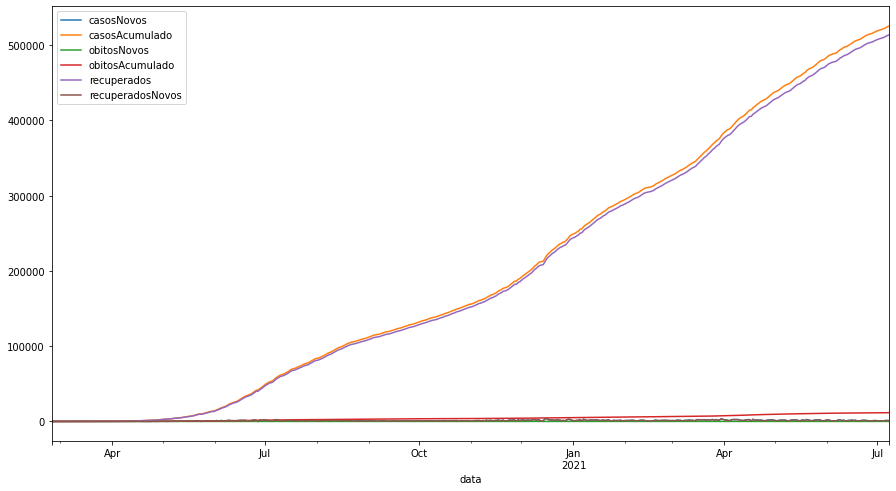

In [ ]:
#Avaliando as séries temporais dos dados ES
df_Covid_ES_New.plot(figsize=(15,8))

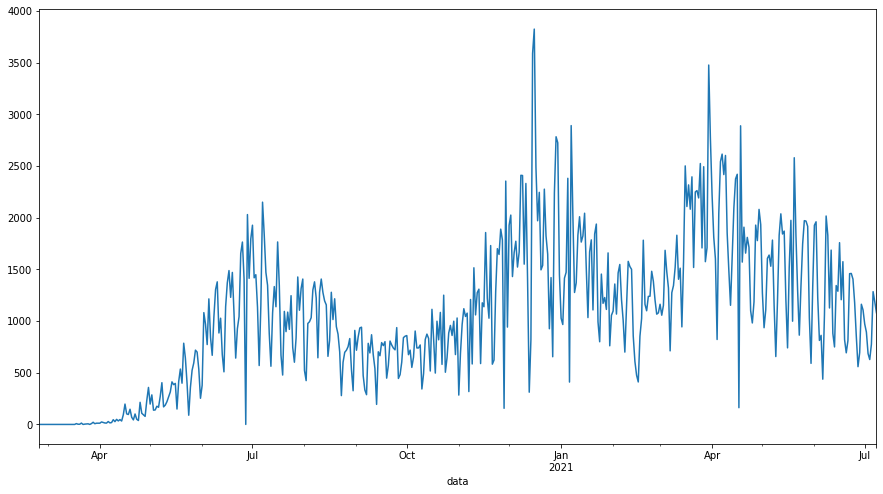

In [ ]:
#Analisando só os casos novos
df_Covid_ES_New['casosNovos'].plot(figsize=(15,8))

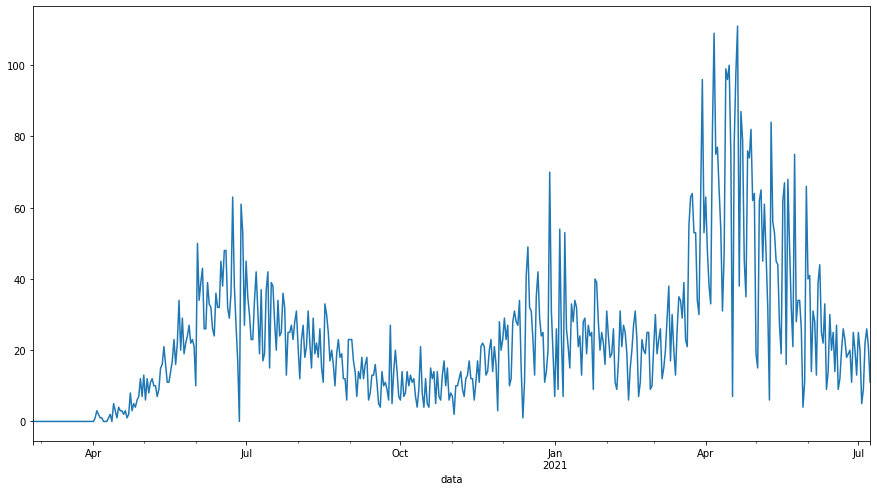

In [ ]:
#Analisando só os óbitos novos
df_Covid_ES_New['obitosNovos'].plot(figsize=(15,8))

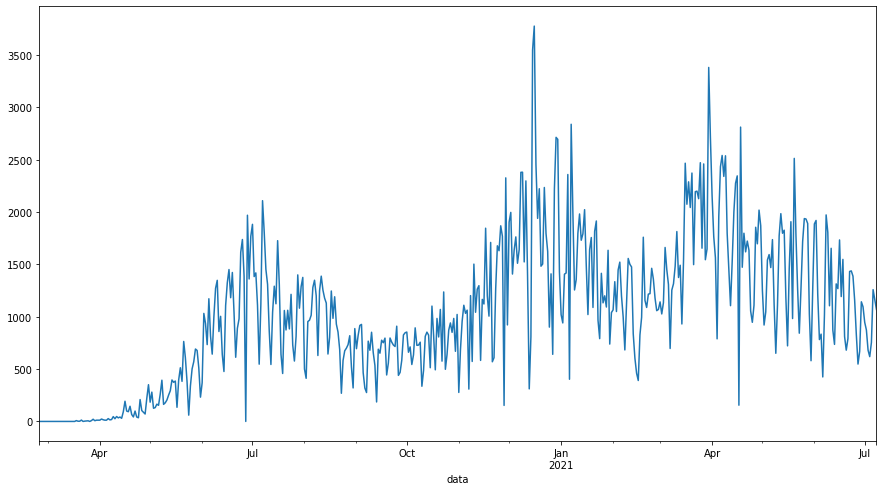

In [ ]:
#Analisando só os recuperados novos
df_Covid_ES_New['recuperadosNovos'].plot(figsize=(15,8))

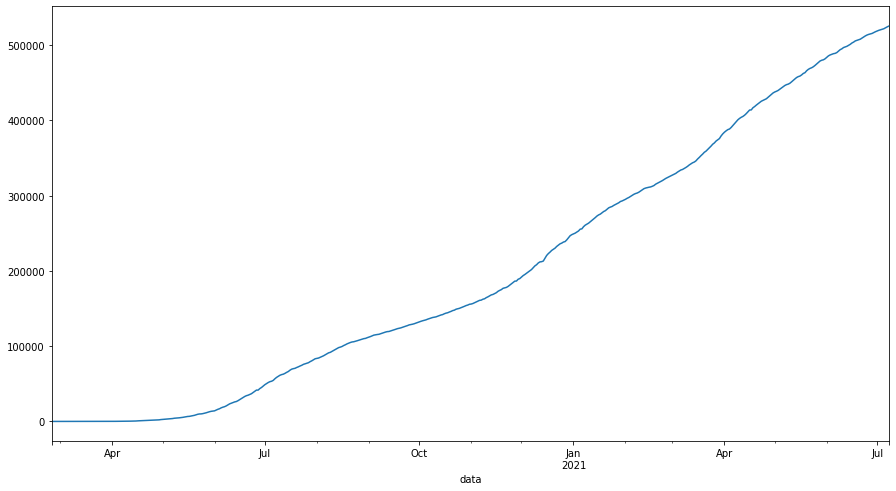

In [ ]:
#Analisando os casos acumulados
df_Covid_ES_New['casosAcumulado'].plot(figsize=(15,8))

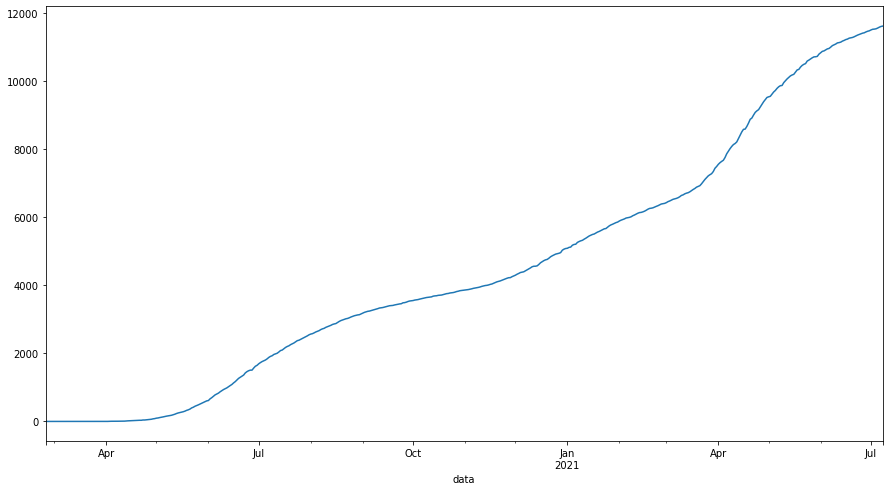

In [ ]:
#Analisando os óbitos acumulados
df_Covid_ES_New['obitosAcumulado'].plot(figsize=(15,8))

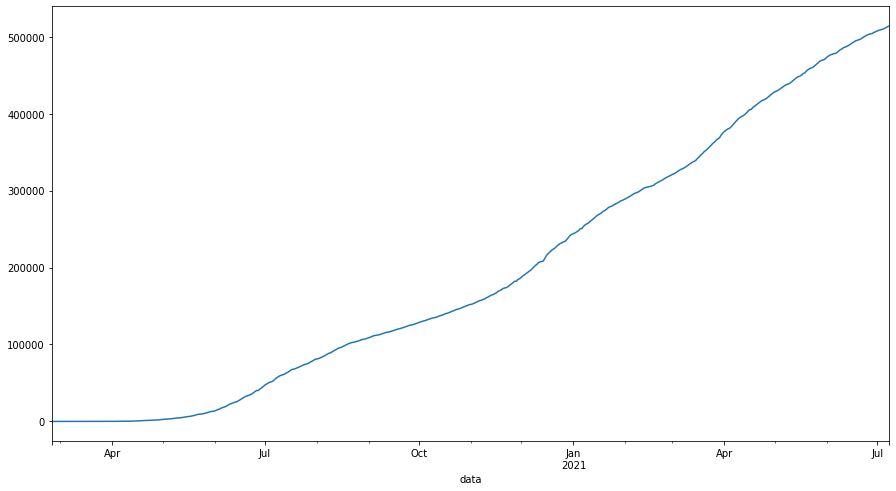

In [ ]:
#Analisando os recuperados acumulados
df_Covid_ES_New['recuperados'].plot(figsize=(15,8))

## Avaliando a média móvel do ES

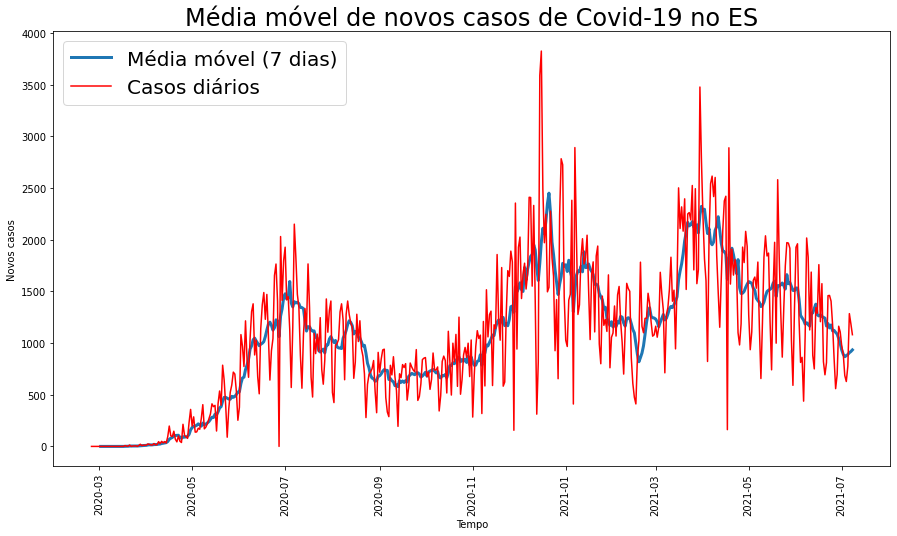

In [ ]:
#Média móvel de casos (7 dias)
plt.figure(figsize=(15, 8))
plt.plot(df_Covid_ES_New['casosNovos'].rolling(window=7).mean(), linewidth=3.0)
plt.plot(df_Covid_ES_New.casosNovos,'r')
plt.xlabel('Tempo')
plt.rcParams.update({'font.size': 20})
plt.xticks(rotation=90)
plt.ylabel('Novos casos')
plt.legend(['Média móvel (7 dias)', 'Casos diários'])
plt.title('Média móvel de novos casos de Covid-19 no ES')
plt.show()

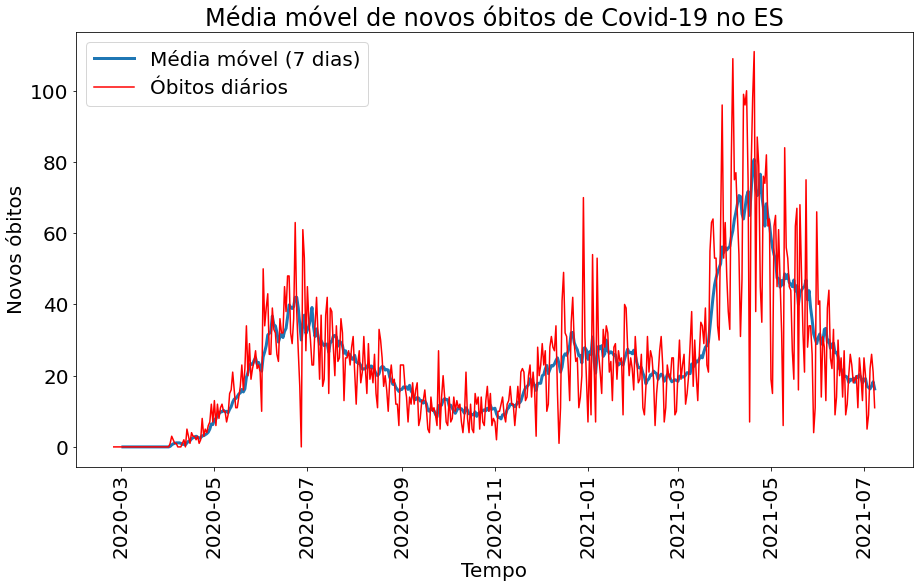

In [ ]:
#Média móvel de óbitos (7 dias)
plt.figure(figsize=(15, 8))
plt.plot(df_Covid_ES_New['obitosNovos'].rolling(window=7).mean(), linewidth=3.0)
plt.plot(df_Covid_ES_New.obitosNovos,'r')
plt.xlabel('Tempo')
plt.rcParams.update({'font.size': 20})
plt.xticks(rotation=90)
plt.ylabel('Novos óbitos')
plt.title('Média móvel de novos óbitos de Covid-19 no ES')
plt.legend(['Média móvel (7 dias)', 'Óbitos diários'])
plt.show()

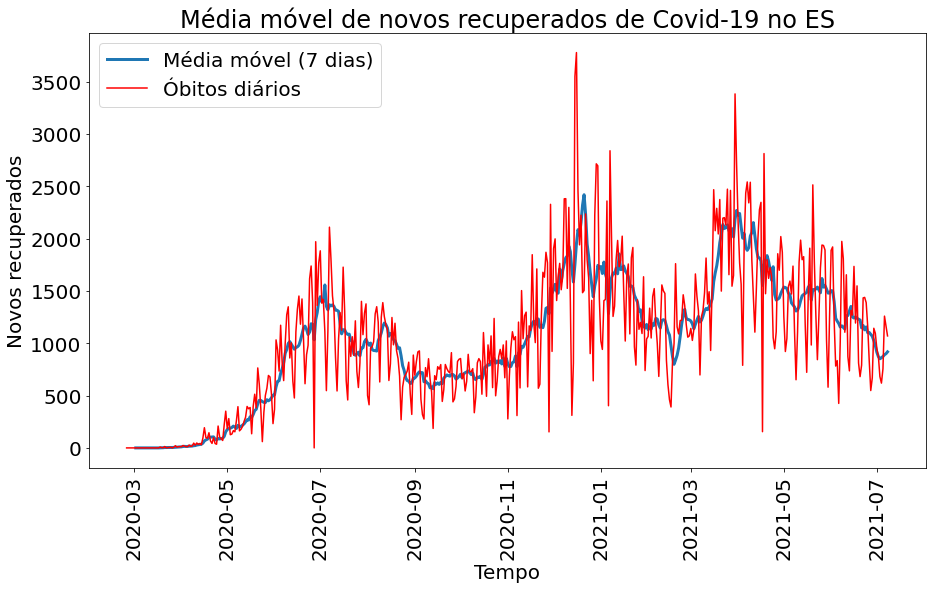

In [ ]:
#Média móvel de recuperados
plt.figure(figsize=(15, 8))
plt.plot(df_Covid_ES_New['recuperadosNovos'].rolling(window=7).mean(), linewidth=3.0)
plt.plot(df_Covid_ES_New.recuperadosNovos,'r')
plt.xlabel('Tempo')
plt.rcParams.update({'font.size': 20})
plt.xticks(rotation=90)
plt.ylabel('Novos recuperados')
plt.title('Média móvel de novos recuperados de Covid-19 no ES')
plt.legend(['Média móvel (7 dias)', 'Óbitos diários'])
plt.show()

## Avaliando a variação e estabilidade do ES

In [ ]:
import math
media_movel_casos = df_Covid_ES_New['casosNovos'].rolling(window=7).mean()
variacao = [0,0,0,0,0,0,0,0,0,0,0,0,0]
for i in range(13,len(media_movel_casos)):
  if math.isnan(media_movel_casos[i-13]) == True or media_movel_casos[i-13] == 0:
    vari = media_movel_casos[i]*100
  else:
    vari = ((media_movel_casos[i] - media_movel_casos[i-13])/(media_movel_casos[i-13]))*100
  variacao.append(vari)
print(variacao)


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 14.285714285714285, 14.285714285714285, 14.285714285714285, 14.285714285714285, 0.0, 0.0, 0.0, 0.0, 0.0, 114.28571428571428, 900.0000000000002, 1100.0, 2400.0000000000005, 2400.0000000000005, 2700.0000000000005, 3099.9999999999995, 2899.9999999999995, 400.0, 485.71428571428567, 600.0, 700.0, 828.5714285714287, 725.0000000000001, 620.0, 700.0, 328.0, 300.0, 278.57142857142856, 281.25, 316.6666666666667, 367.8571428571429, 350.00000000000006, 283.33333333333337, 300.0, 274.13793103448273, 257.57575757575756, 252.77777777777777, 243.75000000000006, 349.53271028037375, 455.99999999999994, 468.86792452830196, 486.8852459016394, 490.4, 471.75572519083966, 394.1176470588235, 278.2608695652174, 178.06122448979593, 205.52995391705068, 164.40677966101694, 155.11811023622047, 106.66666666666667, 69.23076923076925, 101.79856115107913, 112.43781094527365, 88.96648044692735, 87.39837398373984, 90.92122830440587, 102.11640211640211, 139.9014778325123, 151.92660

In [ ]:
df_Covid_ES_New['variacao'] = variacao

In [ ]:
media_movel_obitos = df_Covid_ES_New['obitosNovos'].rolling(window=7).mean()
variacao_mortes = [0,0,0,0,0,0,0,0,0,0,0,0,0]
for i in range(13,len(media_movel_obitos)):
  if math.isnan(media_movel_obitos[i-13]) == True or media_movel_obitos[i-13] == 0:
    vari = media_movel_obitos[i]*100
  else:
    vari = ((media_movel_obitos[i] - media_movel_obitos[i-13])/(media_movel_obitos[i-13]))*100
  variacao_mortes.append(vari)

In [ ]:
media_movel_recuperados = df_Covid_ES_New['recuperadosNovos'].rolling(window=7).mean()
variacao_recuperados = [0,0,0,0,0,0,0,0,0,0,0,0,0]
for i in range(13,len(media_movel_recuperados)):
  if math.isnan(media_movel_recuperados[i-13]) == True or media_movel_recuperados[i-13] == 0:
    vari = media_movel_recuperados[i]*100
  else:
    vari = ((media_movel_recuperados[i] - media_movel_recuperados[i-13])/(media_movel_recuperados[i-13]))*100
  variacao_recuperados.append(vari)

In [ ]:
df_Covid_ES_New['variacaomortes'] = variacao_mortes

In [ ]:
df_Covid_ES_New['variacaorecuperados'] = variacao_recuperados

Text(0, 0.5, 'Variação dos óbitos(%)')

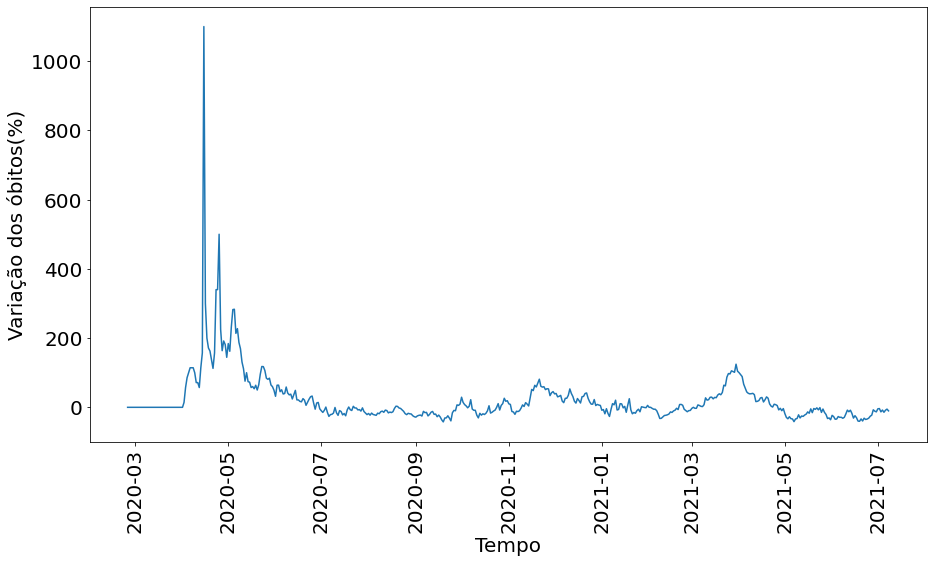

In [ ]:
#Variação Óbitos
plt.figure(figsize=(15, 8))
plt.plot(df_Covid_ES_New.variacaomortes)
plt.rcParams.update({'font.size': 20})
plt.xticks(rotation=90)
plt.xlabel('Tempo')
plt.ylabel('Variação dos óbitos(%)')

Text(0, 0.5, 'Variação (%)')

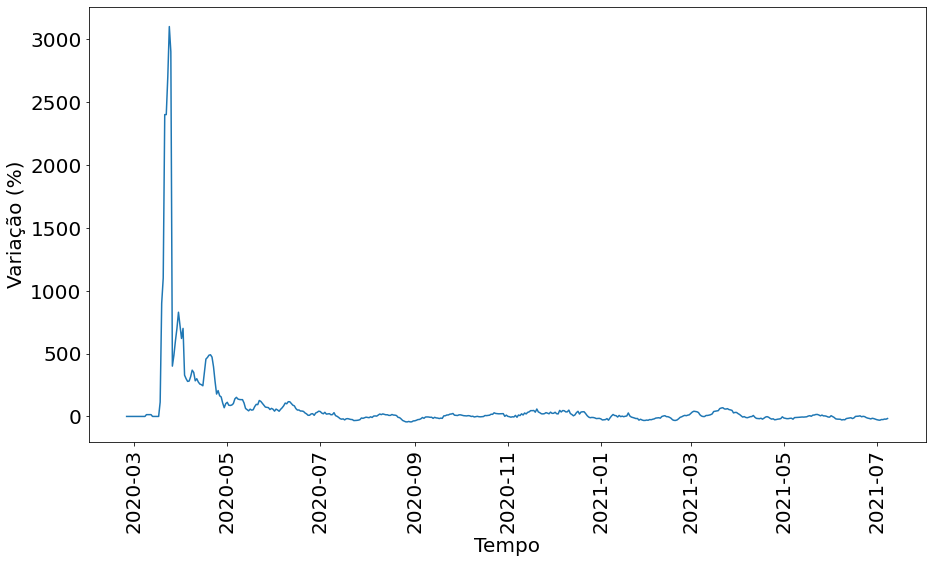

In [ ]:
#Variação
plt.figure(figsize=(15, 8))
plt.plot(df_Covid_ES_New.variacao)
plt.rcParams.update({'font.size': 20})
plt.xticks(rotation=90)
plt.xlabel('Tempo')
plt.ylabel('Variação (%)')

Text(0, 0.5, 'Variação dos casos recuperados (%)')

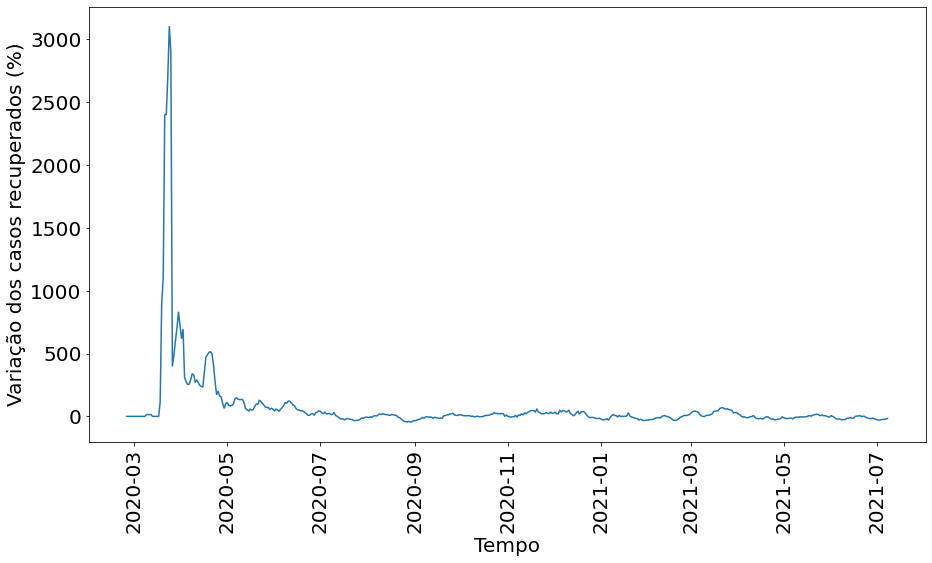

In [ ]:
#Variação recuperados
plt.figure(figsize=(15, 8))
plt.plot(df_Covid_ES_New.variacaorecuperados)
plt.rcParams.update({'font.size': 20})
plt.xticks(rotation=90)
plt.xlabel('Tempo')
plt.ylabel('Variação dos casos recuperados (%)')

In [ ]:
plt.figure(figsize=(15, 8))
plt.hist(variacao2,bins=10)
plt.rcParams.update({'font.size': 20})

NameError: ignored

<Figure size 1080x576 with 0 Axes>

In [ ]:
variacao2 = []
for i,j in enumerate(variacao):
  if j>-100 and j<100:
    variacao2.append(j)


In [ ]:
variacao3 = []
for i,j in enumerate(variacao_mortes):
  if j>-100 and j<100:
    variacao3.append(j)

In [ ]:
variacao4 = []
for i,j in enumerate(variacao_recuperados):
  if j>-100 and j<100:
    variacao4.append(j)

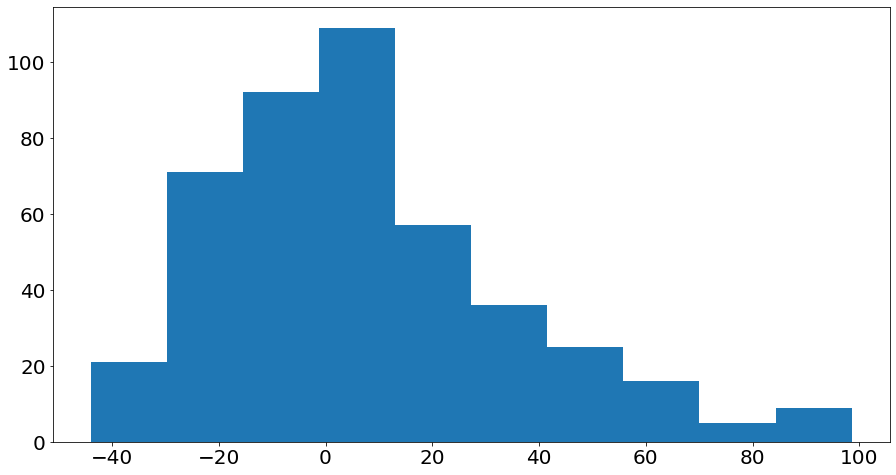

In [ ]:
plt.figure(figsize=(15, 8))
plt.hist(variacao4,bins=10)
plt.rcParams.update({'font.size': 20})

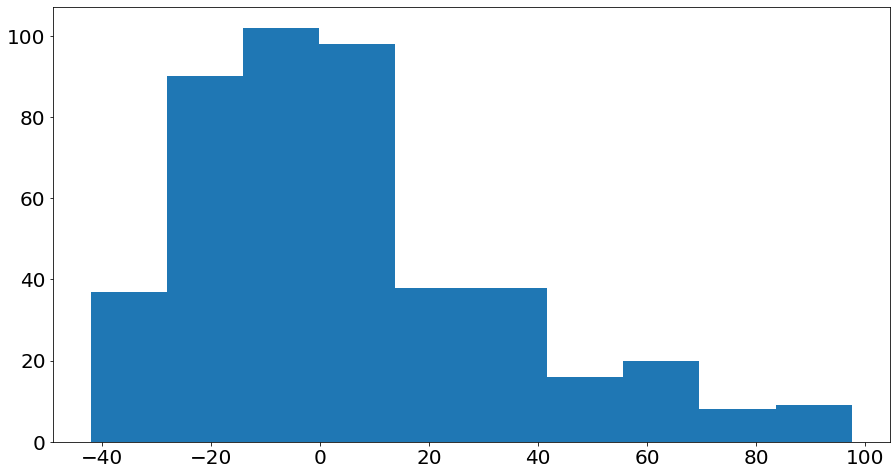

In [ ]:
plt.figure(figsize=(15, 8))
plt.hist(variacao3,bins=10)
plt.rcParams.update({'font.size': 20})

In [ ]:
for i,j in enumerate(variacao):
  if j>-15 and j<15:
    print(f'Não há variação na posição {i}, pois a diferença entre as médias móveis é igual a {(j):.2f}')

Não há variação na posição 0, pois a diferença entre as médias móveis é igual a 0.00
Não há variação na posição 1, pois a diferença entre as médias móveis é igual a 0.00
Não há variação na posição 2, pois a diferença entre as médias móveis é igual a 0.00
Não há variação na posição 3, pois a diferença entre as médias móveis é igual a 0.00
Não há variação na posição 4, pois a diferença entre as médias móveis é igual a 0.00
Não há variação na posição 5, pois a diferença entre as médias móveis é igual a 0.00
Não há variação na posição 6, pois a diferença entre as médias móveis é igual a 0.00
Não há variação na posição 7, pois a diferença entre as médias móveis é igual a 0.00
Não há variação na posição 8, pois a diferença entre as médias móveis é igual a 0.00
Não há variação na posição 9, pois a diferença entre as médias móveis é igual a 0.00
Não há variação na posição 10, pois a diferença entre as médias móveis é igual a 0.00
Não há variação na posição 11, pois a diferença entre as médias 

# Gerando os mesmos gráficos e comparando a média móvel do ES com os estados da região Sudeste

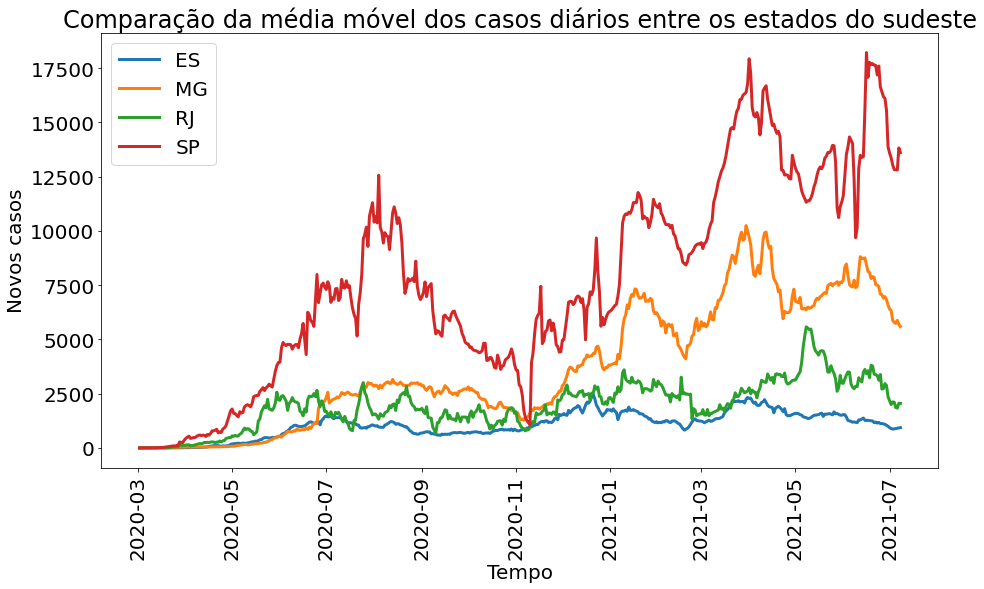

In [ ]:
#Média móvel de casos (7 dias)
plt.figure(figsize=(15, 8))
plt.plot(df_Covid_ES_New['casosNovos'].rolling(window=7).mean(), linewidth=3.0)
plt.plot(df_Covid_MG_New['casosNovos'].rolling(window=7).mean(), linewidth=3.0)
plt.plot(df_Covid_RJ_New['casosNovos'].rolling(window=7).mean(), linewidth=3.0)
plt.plot(df_Covid_SP_New['casosNovos'].rolling(window=7).mean(), linewidth=3.0)
plt.rcParams.update({'font.size': 20})
plt.xticks(rotation=90)
plt.xlabel('Tempo')
plt.ylabel('Novos casos')
plt.legend(['ES', 'MG','RJ','SP'])
plt.title('Comparação da média móvel dos casos diários entre os estados do sudeste')
plt.show()

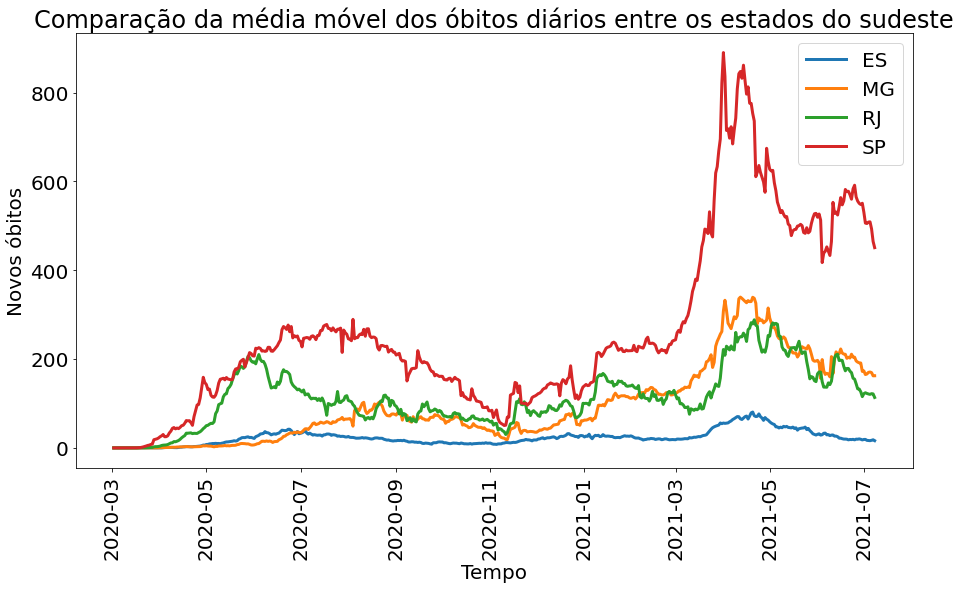

In [ ]:
#Média móvel de óbitos (7 dias)
plt.figure(figsize=(15, 8))
plt.plot(df_Covid_ES_New['obitosNovos'].rolling(window=7).mean(), linewidth=3.0)
plt.plot(df_Covid_MG_New['obitosNovos'].rolling(window=7).mean(), linewidth=3.0)
plt.plot(df_Covid_RJ_New['obitosNovos'].rolling(window=7).mean(), linewidth=3.0)
plt.plot(df_Covid_SP_New['obitosNovos'].rolling(window=7).mean(), linewidth=3.0)
plt.rcParams.update({'font.size': 20})
plt.xticks(rotation=90)
plt.xlabel('Tempo')
plt.ylabel('Novos óbitos')
plt.legend(['ES', 'MG','RJ','SP'])
plt.title('Comparação da média móvel dos óbitos diários entre os estados do sudeste')
plt.show()

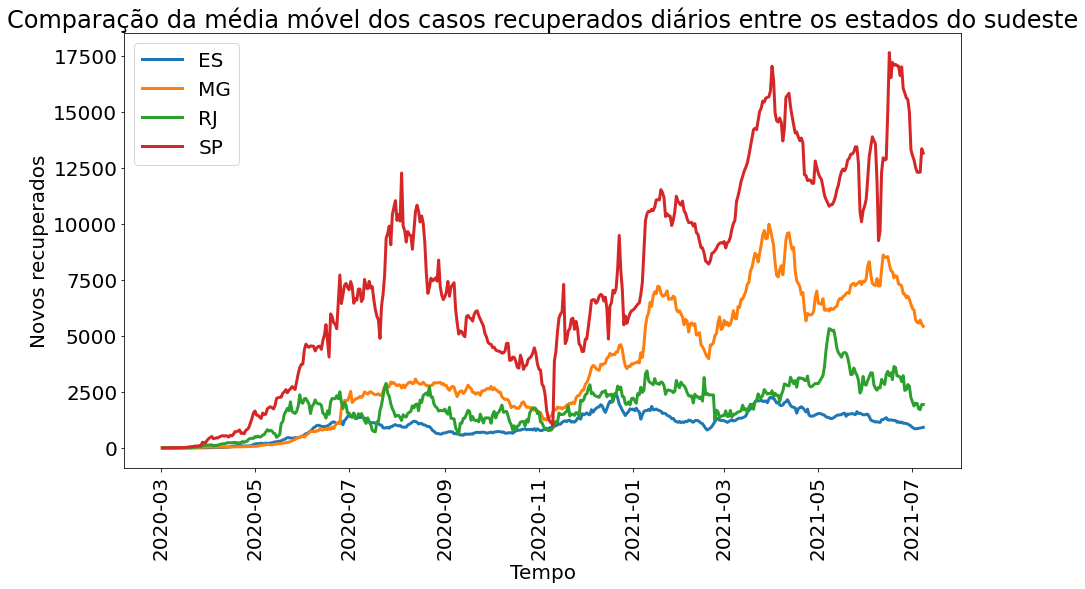

In [ ]:
#Média móvel de recuperados (7 dias)
plt.figure(figsize=(15, 8))
plt.plot(df_Covid_ES_New['recuperadosNovos'].rolling(window=7).mean(), linewidth=3.0)
plt.plot(df_Covid_MG_New['recuperadosNovos'].rolling(window=7).mean(), linewidth=3.0)
plt.plot(df_Covid_RJ_New['recuperadosNovos'].rolling(window=7).mean(), linewidth=3.0)
plt.plot(df_Covid_SP_New['recuperadosNovos'].rolling(window=7).mean(), linewidth=3.0)
plt.rcParams.update({'font.size': 20})
plt.xticks(rotation=90)
plt.xlabel('Tempo')
plt.ylabel('Novos recuperados')
plt.legend(['ES', 'MG','RJ','SP'])
plt.title('Comparação da média móvel dos casos recuperados diários entre os estados do sudeste')
plt.show()

In [ ]:
media_movel_casos_MG = df_Covid_MG_New['casosNovos'].rolling(window=7).mean()
variacao_MG = [0,0,0,0,0,0,0,0,0,0,0,0,0]
for i in range(13,len(media_movel_casos_MG)):
  if math.isnan(media_movel_casos_MG[i-13]) == True or media_movel_casos_MG[i-13] == 0:
    vari_MG = media_movel_casos_MG[i]*100
  else:
    vari_MG = ((media_movel_casos_MG[i] - media_movel_casos_MG[i-13])/(media_movel_casos_MG[i-13]))*100
  variacao_MG.append(vari_MG)
media_movel_casos_RJ = df_Covid_RJ_New['casosNovos'].rolling(window=7).mean()
variacao_RJ = [0,0,0,0,0,0,0,0,0,0,0,0,0]
for i in range(13,len(media_movel_casos_RJ)):
  if math.isnan(media_movel_casos_RJ[i-13]) == True or media_movel_casos_RJ[i-13] == 0:
    vari_RJ = media_movel_casos_RJ[i]*100
  else:
    vari_RJ = ((media_movel_casos_RJ[i] - media_movel_casos_RJ[i-13])/(media_movel_casos_RJ[i-13]))*100
  variacao_RJ.append(vari_RJ)
media_movel_casos_SP = df_Covid_SP_New['casosNovos'].rolling(window=7).mean()
variacao_SP = [0,0,0,0,0,0,0,0,0,0,0,0,0]
for i in range(13,len(media_movel_casos_SP)):
  if math.isnan(media_movel_casos_SP[i-13]) == True or media_movel_casos_SP[i-13] == 0:
    vari_SP = media_movel_casos_SP[i]*100
  else:
    vari_SP = ((media_movel_casos_SP[i] - media_movel_casos_SP[i-13])/(media_movel_casos_SP[i-13]))*100
  variacao_SP.append(vari_SP)

In [ ]:
df_Covid_MG_New['variacao'] = variacao_MG
df_Covid_RJ_New['variacao'] = variacao_RJ
df_Covid_SP_New['variacao'] = variacao_SP

In [ ]:
media_movel_mortes_MG = df_Covid_MG_New['obitosNovos'].rolling(window=7).mean()
variacao_mortes_MG = [0,0,0,0,0,0,0,0,0,0,0,0,0]
for i in range(13,len(media_movel_mortes_MG)):
  if math.isnan(media_movel_mortes_MG[i-13]) == True or media_movel_mortes_MG[i-13] == 0:
    vari_MG = media_movel_mortes_MG[i]*100
  else:
    vari_MG = ((media_movel_mortes_MG[i] - media_movel_mortes_MG[i-13])/(media_movel_mortes_MG[i-13]))*100
  variacao_mortes_MG.append(vari_MG)
media_movel_mortes_RJ = df_Covid_RJ_New['obitosNovos'].rolling(window=7).mean()
variacao_mortes_RJ = [0,0,0,0,0,0,0,0,0,0,0,0,0]
for i in range(13,len(media_movel_mortes_RJ)):
  if math.isnan(media_movel_mortes_RJ[i-13]) == True or media_movel_mortes_RJ[i-13] == 0:
    vari_RJ = media_movel_mortes_RJ[i]*100
  else:
    vari_RJ = ((media_movel_mortes_RJ[i] - media_movel_mortes_RJ[i-13])/(media_movel_mortes_RJ[i-13]))*100
  variacao_mortes_RJ.append(vari_RJ)
media_movel_mortes_SP = df_Covid_SP_New['obitosNovos'].rolling(window=7).mean()
variacao_mortes_SP = [0,0,0,0,0,0,0,0,0,0,0,0,0]
for i in range(13,len(media_movel_mortes_SP)):
  if math.isnan(media_movel_mortes_SP[i-13]) == True or media_movel_mortes_SP[i-13] == 0:
    vari_SP = media_movel_mortes_SP[i]*100
  else:
    vari_SP = ((media_movel_mortes_SP[i] - media_movel_mortes_SP[i-13])/(media_movel_mortes_SP[i-13]))*100
  variacao_mortes_SP.append(vari_SP)

In [ ]:
df_Covid_MG_New['variacaoobitos'] = variacao_mortes_MG
df_Covid_RJ_New['variacaoobitos'] = variacao_mortes_RJ
df_Covid_SP_New['variacaoobitos'] = variacao_mortes_SP

In [ ]:
media_movel_recuperados_MG = df_Covid_MG_New['recuperadosNovos'].rolling(window=7).mean()
variacao_recuperados_MG = [0,0,0,0,0,0,0,0,0,0,0,0,0]
for i in range(13,len(media_movel_recuperados_MG)):
  if math.isnan(media_movel_recuperados_MG[i-13]) == True or media_movel_recuperados_MG[i-13] == 0:
    vari_MG = media_movel_recuperados_MG[i]*100
  else:
    vari_MG = ((media_movel_recuperados_MG[i] - media_movel_recuperados_MG[i-13])/(media_movel_recuperados_MG[i-13]))*100
  variacao_recuperados_MG.append(vari_MG)
media_movel_recuperados_RJ = df_Covid_RJ_New['recuperadosNovos'].rolling(window=7).mean()
variacao_recuperados_RJ = [0,0,0,0,0,0,0,0,0,0,0,0,0]
for i in range(13,len(media_movel_recuperados_RJ)):
  if math.isnan(media_movel_recuperados_RJ[i-13]) == True or media_movel_recuperados_RJ[i-13] == 0:
    vari_RJ = media_movel_recuperados_RJ[i]*100
  else:
    vari_RJ = ((media_movel_recuperados_RJ[i] - media_movel_recuperados_RJ[i-13])/(media_movel_recuperados_RJ[i-13]))*100
  variacao_recuperados_RJ.append(vari_RJ)
media_movel_recuperados_SP = df_Covid_SP_New['recuperadosNovos'].rolling(window=7).mean()
variacao_recuperados_SP = [0,0,0,0,0,0,0,0,0,0,0,0,0]
for i in range(13,len(media_movel_recuperados_SP)):
  if math.isnan(media_movel_recuperados_SP[i-13]) == True or media_movel_recuperados_SP[i-13] == 0:
    vari_SP = media_movel_recuperados_SP[i]*100
  else:
    vari_SP = ((media_movel_recuperados_SP[i] - media_movel_recuperados_SP[i-13])/(media_movel_recuperados_SP[i-13]))*100
  variacao_recuperados_SP.append(vari_SP)

In [ ]:
variacao_recuperados_SP

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 200.0,
 242.85714285714283,
 385.7142857142857,
 514.2857142857143,
 657.1428571428571,
 742.8571428571429,
 5900.000000000001,
 6700.0,
 7100.000000000002,
 4019.9999999999995,
 2566.6666666666665,
 2909.0909090909095,
 2607.1428571428573,
 3278.5714285714284,
 3211.7647058823527,
 2148.148148148148,
 1505.5555555555554,
 1447.8260869565217,
 1376.923076923077,
 1386.6666666666667,
 1113.2352941176473,
 1007.6388888888888,
 1035.4368932038835,
 1112.0833333333333,
 875.8308157099698,
 844.5910290237466,
 509.72515856236794,
 431.43872113676724,
 420.26359143327846,
 437.7162629757786,
 386.37640449438203,
 377.34374999999994,
 115.63901345291478,
 121.3939393939394,
 139.62382445141063,
 59.25609234715689,
 15.675489859058104,
 23.37461300309598,
 4.217877094972064,
 46.91400832177533,
 68.58288770053474,
 61.019632678910696,
 69.11196911196912,
 62.171527577245165,
 23.158756137479553,
 21.653236288016636,
 20.4763208321927,
 42.17

In [ ]:
df_Covid_MG_New['variacaorecuperados'] = variacao_recuperados_MG
df_Covid_RJ_New['variacaorecuperados'] = variacao_recuperados_RJ
df_Covid_SP_New['variacaorecuperados'] = variacao_recuperados_SP

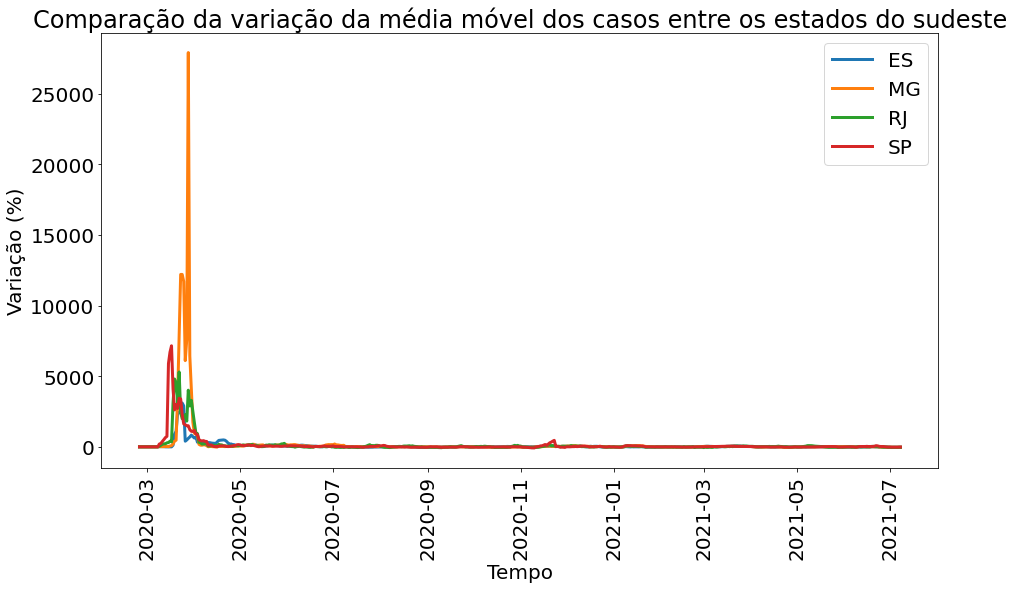

In [ ]:
#Variação para os estados do sudeste
plt.figure(figsize=(15, 8))
plt.plot(df_Covid_ES_New['variacao'], linewidth=3.0)
plt.plot(df_Covid_MG_New['variacao'], linewidth=3.0)
plt.plot(df_Covid_RJ_New['variacao'], linewidth=3.0)
plt.plot(df_Covid_SP_New['variacao'], linewidth=3.0)
plt.rcParams.update({'font.size': 20})
plt.xticks(rotation=90)
plt.xlabel('Tempo')
plt.ylabel('Variação (%)')
plt.legend(['ES', 'MG','RJ','SP'])
plt.title('Comparação da variação da média móvel dos casos entre os estados do sudeste')
plt.show()

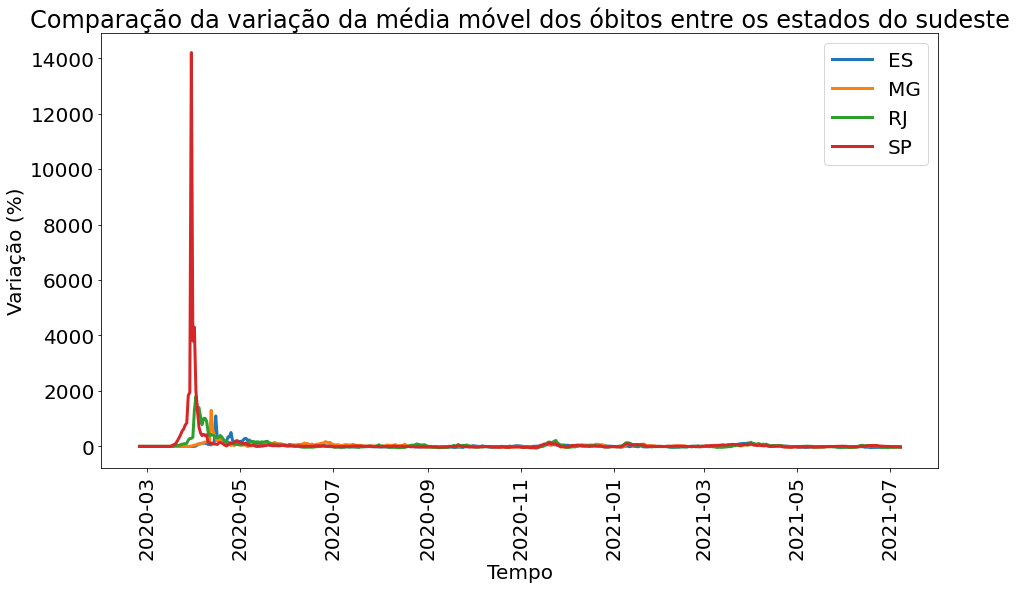

In [ ]:
#Variação para os estados do sudeste
plt.figure(figsize=(15, 8))
plt.plot(df_Covid_ES_New['variacaomortes'], linewidth=3.0)
plt.plot(df_Covid_MG_New['variacaoobitos'], linewidth=3.0)
plt.plot(df_Covid_RJ_New['variacaoobitos'], linewidth=3.0)
plt.plot(df_Covid_SP_New['variacaoobitos'], linewidth=3.0)
plt.rcParams.update({'font.size': 20})
plt.xticks(rotation=90)
plt.xlabel('Tempo')
plt.ylabel('Variação (%)')
plt.legend(['ES', 'MG','RJ','SP'])
plt.title('Comparação da variação da média móvel dos óbitos entre os estados do sudeste')
plt.show()

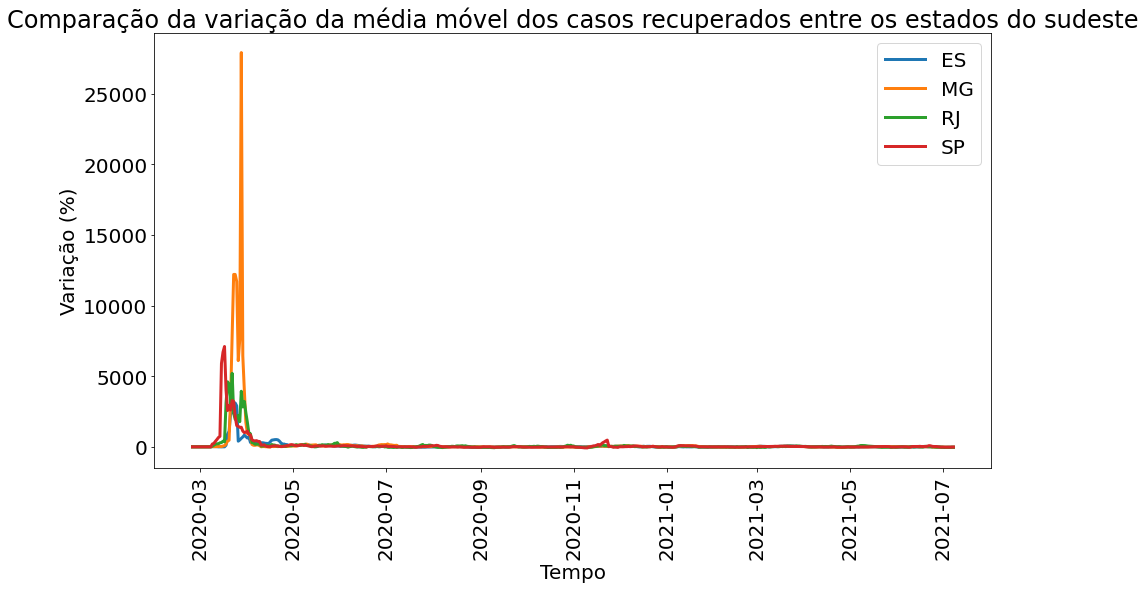

In [ ]:
#Variação para os estados do sudeste
plt.figure(figsize=(15, 8))
plt.plot(df_Covid_ES_New['variacaorecuperados'], linewidth=3.0)
plt.plot(df_Covid_MG_New['variacaorecuperados'], linewidth=3.0)
plt.plot(df_Covid_RJ_New['variacaorecuperados'], linewidth=3.0)
plt.plot(df_Covid_SP_New['variacaorecuperados'], linewidth=3.0)
plt.rcParams.update({'font.size': 20})
plt.xticks(rotation=90)
plt.xlabel('Tempo')
plt.ylabel('Variação (%)')
plt.legend(['ES', 'MG','RJ','SP'])
plt.title('Comparação da variação da média móvel dos casos recuperados entre os estados do sudeste')
plt.show()

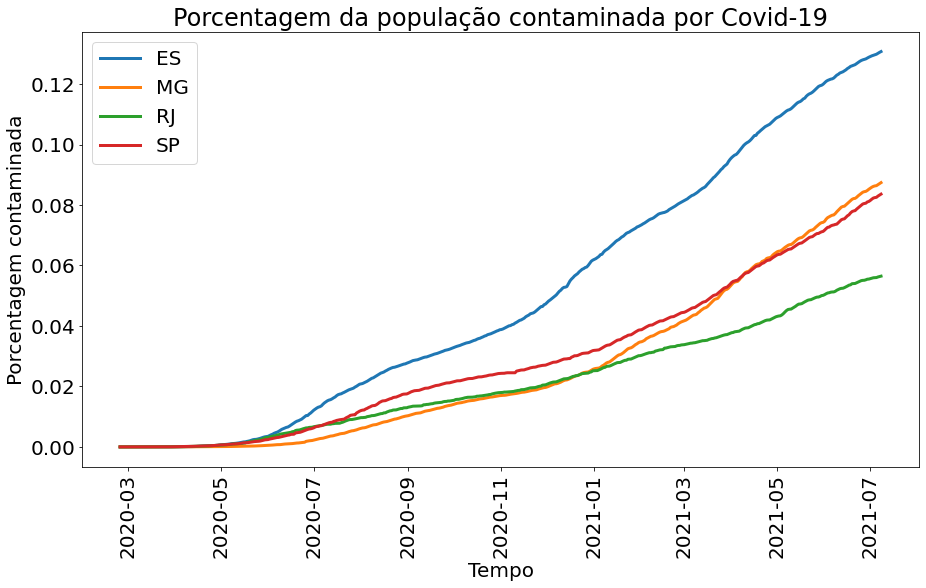

In [ ]:
#Comparando os casos dos estados
plt.figure(figsize=(15, 8))
plt.plot(df_Covid_ES_New['casosAcumulado']/df_Covid_ES.populacaoTCU2019.max(), linewidth=3.0)
plt.plot(df_Covid_MG_New['casosAcumulado']/df_Covid_MG.populacaoTCU2019.max(), linewidth=3.0)
plt.plot(df_Covid_RJ_New['casosAcumulado']/df_Covid_RJ.populacaoTCU2019.max(), linewidth=3.0)
plt.plot(df_Covid_SP_New['casosAcumulado']/df_Covid_SP.populacaoTCU2019.max(), linewidth=3.0)
plt.xlabel('Tempo')
plt.rcParams.update({'font.size': 20})
plt.xticks(rotation=90)
plt.ylabel('Porcentagem contaminada')
plt.legend(['ES', 'MG','RJ','SP'])
plt.title('Porcentagem da população contaminada por Covid-19')
plt.show()

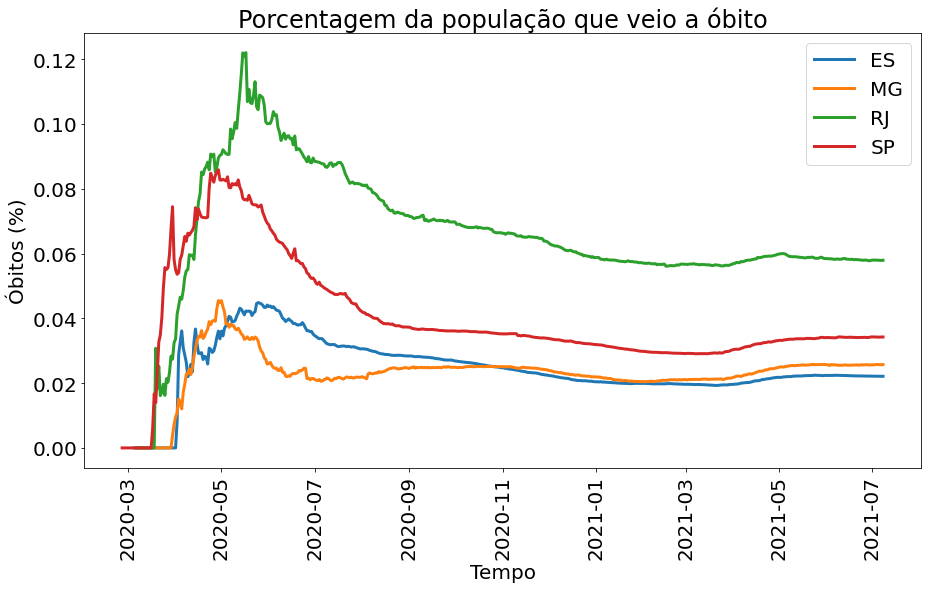

In [ ]:
#Comparando os casos dos estados
plt.figure(figsize=(15, 8))
plt.plot(df_Covid_ES_New['obitosAcumulado']/df_Covid_ES_New['casosAcumulado'], linewidth=3.0)
plt.plot(df_Covid_MG_New['obitosAcumulado']/df_Covid_MG_New['casosAcumulado'], linewidth=3.0)
plt.plot(df_Covid_RJ_New['obitosAcumulado']/df_Covid_RJ_New['casosAcumulado'], linewidth=3.0)
plt.plot(df_Covid_SP_New['obitosAcumulado']/df_Covid_SP_New['casosAcumulado'], linewidth=3.0)
plt.xlabel('Tempo')
plt.rcParams.update({'font.size': 20})
plt.xticks(rotation=90)
plt.ylabel('Óbitos (%)')
plt.legend(['ES', 'MG','RJ','SP'])
plt.title('Porcentagem da população que veio a óbito')
plt.show()

In [ ]:
variacao5 = []
for i,j in enumerate(variacao_MG):
  if j>-100 and j<100:
    variacao5.append(j)

variacao6 = []
for i,j in enumerate(variacao_RJ):
  if j>-100 and j<100:
    variacao6.append(j)

variacao7 = []
for i,j in enumerate(variacao_SP):
  if j>-100 and j<100:
    variacao7.append(j)

Text(0.5, 1.0, 'Distribuição da variação de casos em SP')

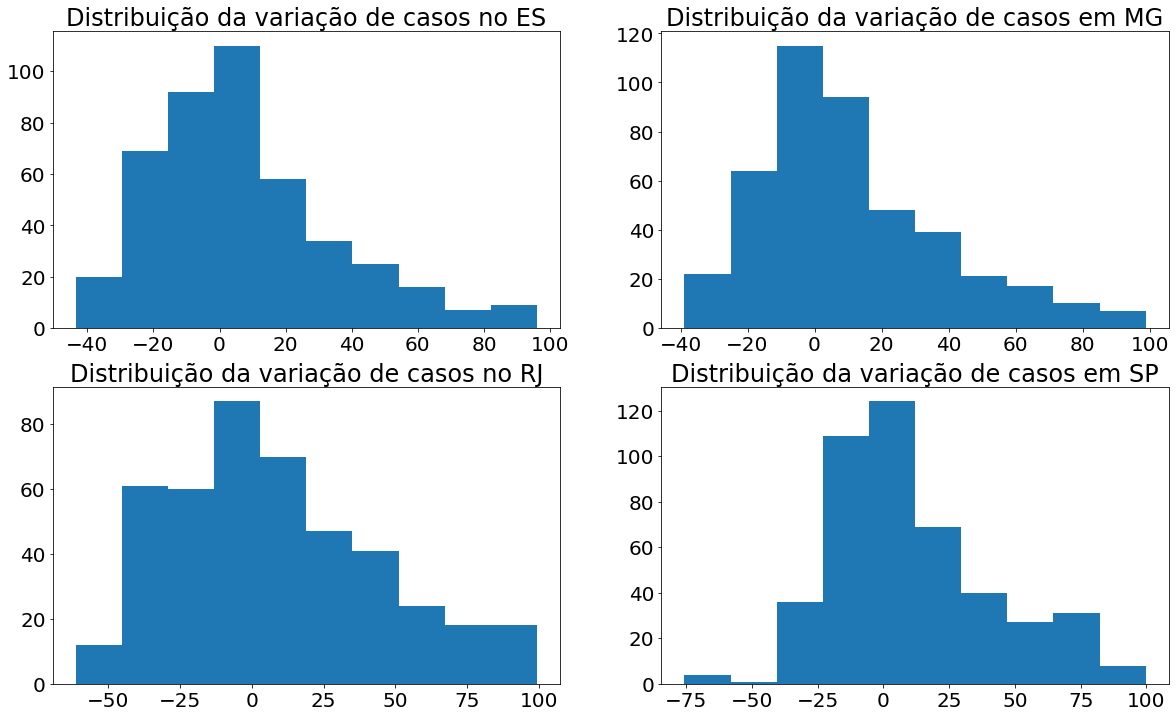

In [ ]:
plt.figure(figsize=(20, 12))
plt.subplot(2, 2, 1)
plt.hist(variacao2,bins=10)
plt.rcParams.update({'font.size': 20})
plt.title("Distribuição da variação de casos no ES")
plt.subplot(2, 2, 2)
plt.hist(variacao5,bins=10)
plt.rcParams.update({'font.size': 20})
plt.title("Distribuição da variação de casos em MG")
plt.subplot(2, 2, 3)
plt.hist(variacao6,bins=10)
plt.rcParams.update({'font.size': 20})
plt.title("Distribuição da variação de casos no RJ")
plt.subplot(2, 2, 4)
plt.hist(variacao7,bins=10)
plt.rcParams.update({'font.size': 20})
plt.title("Distribuição da variação de casos em SP")


In [ ]:
variacao8 = []
for i,j in enumerate(variacao_mortes_MG):
  if j>-100 and j<100:
    variacao8.append(j)

variacao9 = []
for i,j in enumerate(variacao_mortes_RJ):
  if j>-100 and j<100:
    variacao9.append(j)

variacao10 = []
for i,j in enumerate(variacao_mortes_SP):
  if j>-100 and j<100:
    variacao10.append(j)

Text(0.5, 1.0, 'Distribuição da variação de óbitos em SP')

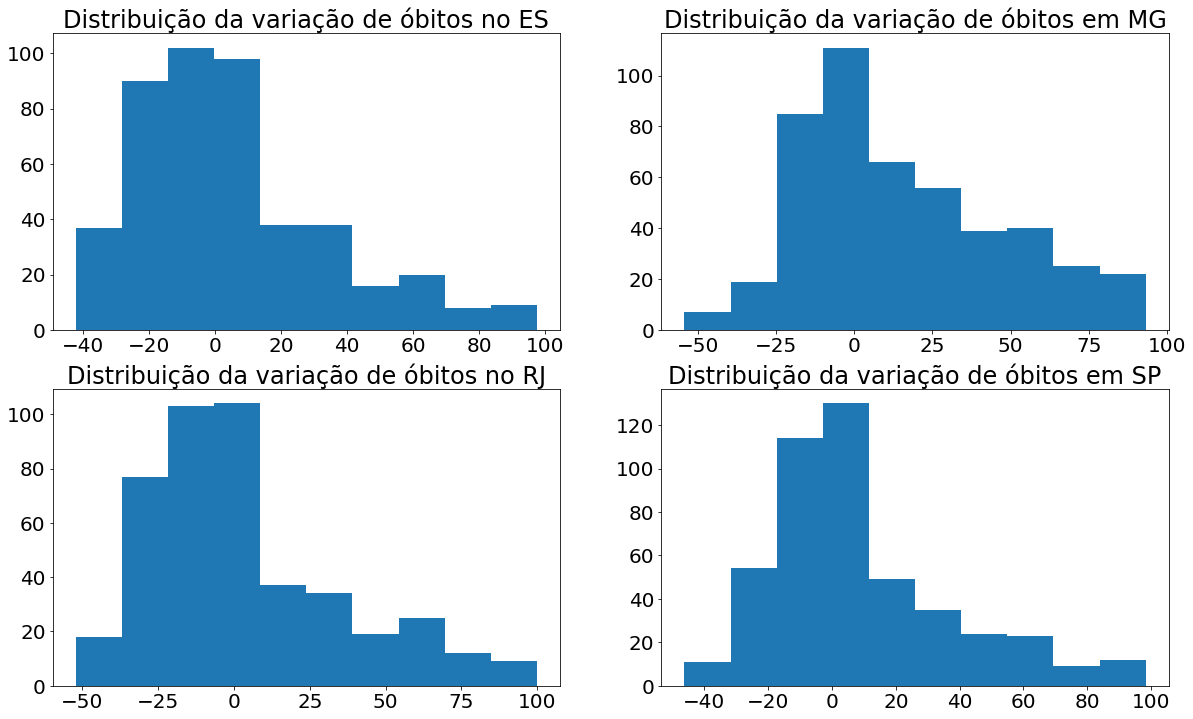

In [ ]:
plt.figure(figsize=(20, 12))
plt.subplot(2, 2, 1)
plt.hist(variacao3,bins=10)
plt.rcParams.update({'font.size': 20})
plt.title("Distribuição da variação de óbitos no ES")
plt.subplot(2, 2, 2)
plt.hist(variacao8,bins=10)
plt.rcParams.update({'font.size': 20})
plt.title("Distribuição da variação de óbitos em MG")
plt.subplot(2, 2, 3)
plt.hist(variacao9,bins=10)
plt.rcParams.update({'font.size': 20})
plt.title("Distribuição da variação de óbitos no RJ")
plt.subplot(2, 2, 4)
plt.hist(variacao10,bins=10)
plt.rcParams.update({'font.size': 20})
plt.title("Distribuição da variação de óbitos em SP")

In [ ]:
variacao11 = []
for i,j in enumerate(variacao_recuperados_MG):
  if j>-100 and j<100:
    variacao11.append(j)

variacao12 = []
for i,j in enumerate(variacao_recuperados_RJ):
  if j>-100 and j<100:
    variacao12.append(j)

variacao13 = []
for i,j in enumerate(variacao_recuperados_SP):
  if j>-100 and j<100:
    variacao13.append(j)

Text(0.5, 1.0, 'Distribuição da variação de recuperados em SP')

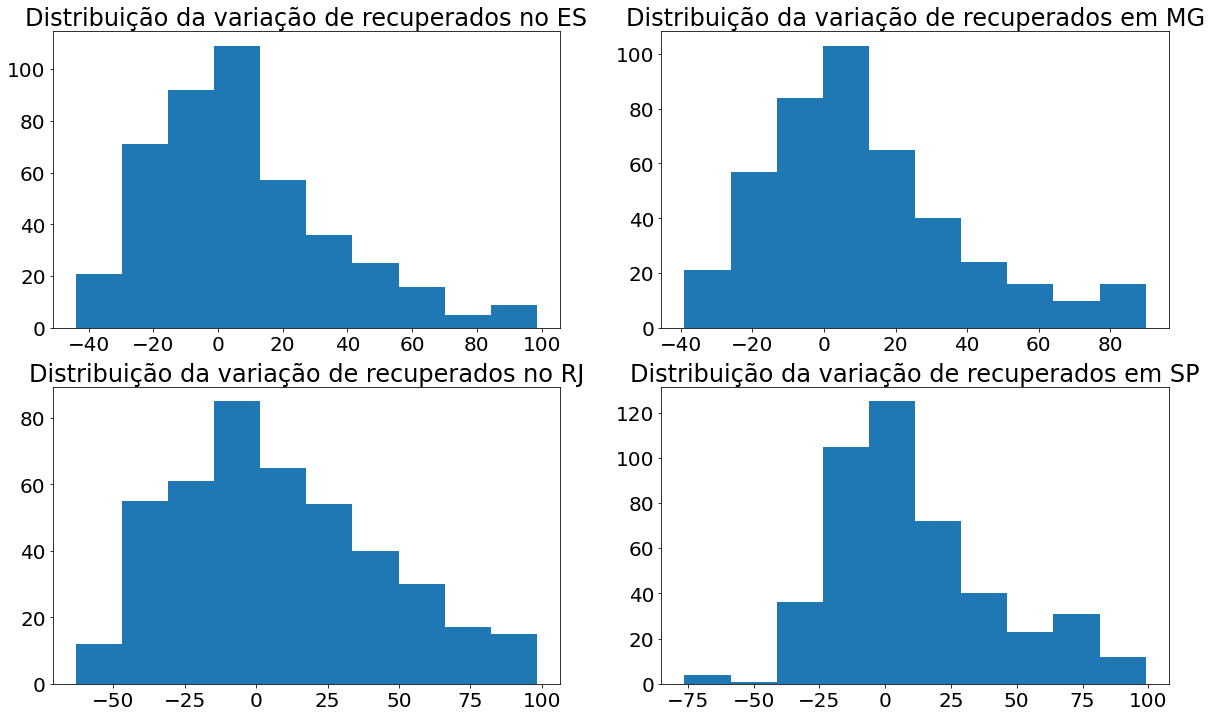

In [ ]:
plt.figure(figsize=(20, 12))
plt.subplot(2, 2, 1)
plt.hist(variacao4,bins=10)
plt.rcParams.update({'font.size': 20})
plt.title("Distribuição da variação de recuperados no ES")
plt.subplot(2, 2, 2)
plt.hist(variacao11,bins=10)
plt.rcParams.update({'font.size': 20})
plt.title("Distribuição da variação de recuperados em MG")
plt.subplot(2, 2, 3)
plt.hist(variacao12,bins=10)
plt.rcParams.update({'font.size': 20})
plt.title("Distribuição da variação de recuperados no RJ")
plt.subplot(2, 2, 4)
plt.hist(variacao13,bins=10)
plt.rcParams.update({'font.size': 20})
plt.title("Distribuição da variação de recuperados em SP")